# Multi-armed bandits

River has a `bandit` module. It contains several multi-armed bandit policies, bandit environments, and utilities to benchmark policies on bandit problems.

Bandit environments in River implement the [Gym](https://www.gymlibrary.dev/) interface. You can thus load them with `gym.make`. Note that Gym is intended for reinforcement learning algorithms, while bandit policies are the simplest form of reinforcement learing. Bandit policies learn by receiving a reward after each step, while reinforcement learning algorithms have to learn from feedback that may arrive at the end of a (long) sequence of steps.

In [1]:
import gymnasium as gym

for k in gym.envs.registry:
    if k.startswith('river_bandits'):
        print(k)


River's bandit module offers the `bandit.evaluate` function to benchmark several policies on a given environment. It takes as input a list of bandit policies, a bandit environment (the problem to solve), and a reward object.

In [2]:
import gymnasium as gym
from river import bandit
import pandas as pd
from tqdm import tqdm
from river import stats

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)

trace = bandit.evaluate(
    policies=policies,
    env=env,
    reward_stat=stats.Mean(),
    n_episodes=(n_episodes := 2000),
)


The `bandit.evaluate` function returns a generator containing the results at each step of the benchmark. This can be wrapped with a `pandas.DataFrame` to gather all the results.

In [3]:
trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))
trace_df.sample(5, random_state=42)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 11835/6000000 [00:00<00:50, 118344.75it/s]

  0%|          | 23856/6000000 [00:00<00:50, 119434.80it/s]

  1%|          | 35917/6000000 [00:00<00:49, 119970.67it/s]

  1%|          | 48001/6000000 [00:00<00:49, 120273.04it/s]

  1%|          | 60029/6000000 [00:00<00:49, 120193.15it/s]

  1%|          | 72087/6000000 [00:00<00:49, 120321.42it/s]

  1%|▏         | 84120/6000000 [00:00<00:49, 120219.26it/s]

  2%|▏         | 96383/6000000 [00:00<00:48, 120985.44it/s]

  2%|▏         | 108482/6000000 [00:00<00:48, 120596.95it/s]

  2%|▏         | 120620/6000000 [00:01<00:48, 120835.60it/s]

  2%|▏         | 132848/6000000 [00:01<00:48, 121274.32it/s]

  2%|▏         | 144976/6000000 [00:01<00:48, 120889.91it/s]

  3%|▎         | 157085/6000000 [00:01<00:48, 120948.89it/s]

  3%|▎         | 169218/6000000 [00:01<00:48, 121060.92it/s]

  3%|▎         | 181325/6000000 [00:01<00:48, 120794.21it/s]

  3%|▎         | 193405/6000000 [00:01<00:48, 120338.79it/s]

  3%|▎         | 205440/6000000 [00:01<00:48, 119123.61it/s]

  4%|▎         | 217496/6000000 [00:01<00:48, 119549.83it/s]

  4%|▍         | 229617/6000000 [00:01<00:48, 120043.36it/s]

  4%|▍         | 241624/6000000 [00:02<00:48, 119907.54it/s]

  4%|▍         | 253889/6000000 [00:02<00:47, 120725.19it/s]

  4%|▍         | 265965/6000000 [00:02<00:47, 120733.57it/s]

  5%|▍         | 278040/6000000 [00:02<00:47, 120642.58it/s]

  5%|▍         | 290321/6000000 [00:02<00:47, 121290.32it/s]

  5%|▌         | 302451/6000000 [00:02<00:47, 120766.44it/s]

  5%|▌         | 314529/6000000 [00:02<00:47, 120272.53it/s]

  5%|▌         | 326558/6000000 [00:02<00:47, 120194.09it/s]

  6%|▌         | 338578/6000000 [00:02<00:47, 120170.39it/s]

  6%|▌         | 350596/6000000 [00:02<00:47, 119973.24it/s]

  6%|▌         | 362618/6000000 [00:03<00:46, 120044.65it/s]

  6%|▌         | 374623/6000000 [00:03<00:46, 119984.30it/s]

  6%|▋         | 386622/6000000 [00:03<00:46, 119811.76it/s]

  7%|▋         | 398676/6000000 [00:03<00:46, 120027.24it/s]

  7%|▋         | 410712/6000000 [00:03<00:46, 120123.67it/s]

  7%|▋         | 422808/6000000 [00:03<00:46, 120372.23it/s]

  7%|▋         | 434846/6000000 [00:03<00:46, 119245.14it/s]

  7%|▋         | 446773/6000000 [00:03<00:46, 118192.14it/s]

  8%|▊         | 458596/6000000 [00:03<00:55, 100171.33it/s]

  8%|▊         | 470605/6000000 [00:03<00:52, 105433.36it/s]

  8%|▊         | 482639/6000000 [00:04<00:50, 109516.91it/s]

  8%|▊         | 494526/6000000 [00:04<00:49, 112145.44it/s]

  8%|▊         | 506439/6000000 [00:04<00:48, 114144.81it/s]

  9%|▊         | 518351/6000000 [00:04<00:47, 115588.02it/s]

  9%|▉         | 530312/6000000 [00:04<00:46, 116766.61it/s]

  9%|▉         | 542298/6000000 [00:04<00:46, 117679.49it/s]

  9%|▉         | 554295/6000000 [00:04<00:46, 118357.91it/s]

  9%|▉         | 566458/6000000 [00:04<00:45, 119330.84it/s]

 10%|▉         | 578426/6000000 [00:04<00:45, 119432.67it/s]

 10%|▉         | 590393/6000000 [00:04<00:45, 119453.84it/s]

 10%|█         | 602358/6000000 [00:05<00:45, 119509.39it/s]

 10%|█         | 614321/6000000 [00:05<00:45, 119488.99it/s]

 10%|█         | 626559/6000000 [00:05<00:44, 120352.70it/s]

 11%|█         | 638601/6000000 [00:05<00:44, 120207.60it/s]

 11%|█         | 650698/6000000 [00:05<00:44, 120433.26it/s]

 11%|█         | 662745/6000000 [00:05<00:44, 120225.66it/s]

 11%|█         | 674839/6000000 [00:05<00:44, 120437.55it/s]

 11%|█▏        | 686885/6000000 [00:05<00:44, 118948.81it/s]

 12%|█▏        | 699001/6000000 [00:05<00:44, 119008.78it/s]

 12%|█▏        | 711001/6000000 [00:05<00:44, 119300.14it/s]

 12%|█▏        | 723099/6000000 [00:06<00:44, 119799.77it/s]

 12%|█▏        | 735222/6000000 [00:06<00:43, 120224.37it/s]

 12%|█▏        | 747374/6000000 [00:06<00:43, 120608.17it/s]

 13%|█▎        | 759513/6000000 [00:06<00:43, 120840.34it/s]

 13%|█▎        | 771599/6000000 [00:06<00:43, 120564.70it/s]

 13%|█▎        | 783697/6000000 [00:06<00:43, 120686.81it/s]

 13%|█▎        | 796022/6000000 [00:06<00:42, 121453.46it/s]

 13%|█▎        | 808168/6000000 [00:06<00:43, 118832.50it/s]

 14%|█▎        | 820184/6000000 [00:06<00:43, 119222.74it/s]

 14%|█▍        | 832143/6000000 [00:06<00:43, 119328.49it/s]

 14%|█▍        | 844217/6000000 [00:07<00:43, 119746.28it/s]

 14%|█▍        | 856328/6000000 [00:07<00:42, 120151.84it/s]

 14%|█▍        | 868410/6000000 [00:07<00:42, 120350.58it/s]

 15%|█▍        | 880455/6000000 [00:07<00:42, 120378.21it/s]

 15%|█▍        | 892632/6000000 [00:07<00:42, 120792.81it/s]

 15%|█▌        | 904850/6000000 [00:07<00:42, 121206.86it/s]

 15%|█▌        | 916972/6000000 [00:07<00:42, 120959.92it/s]

 15%|█▌        | 929158/6000000 [00:07<00:41, 121227.33it/s]

 16%|█▌        | 941282/6000000 [00:07<00:41, 120742.48it/s]

 16%|█▌        | 953358/6000000 [00:07<00:41, 120444.48it/s]

 16%|█▌        | 965640/6000000 [00:08<00:41, 121151.40it/s]

 16%|█▋        | 977826/6000000 [00:08<00:41, 121362.30it/s]

 16%|█▋        | 989963/6000000 [00:08<00:41, 121173.18it/s]

 17%|█▋        | 1002081/6000000 [00:08<00:41, 120041.65it/s]

 17%|█▋        | 1014088/6000000 [00:08<00:41, 119976.77it/s]

 17%|█▋        | 1026088/6000000 [00:08<00:41, 119963.18it/s]

 17%|█▋        | 1038318/6000000 [00:08<00:41, 120659.00it/s]

 18%|█▊        | 1050386/6000000 [00:08<00:41, 118948.18it/s]

 18%|█▊        | 1062719/6000000 [00:08<00:41, 120245.90it/s]

 18%|█▊        | 1074750/6000000 [00:09<00:40, 120211.21it/s]

 18%|█▊        | 1086817/6000000 [00:09<00:40, 120345.96it/s]

 18%|█▊        | 1098924/6000000 [00:09<00:40, 120560.95it/s]

 19%|█▊        | 1111020/6000000 [00:09<00:40, 120678.60it/s]

 19%|█▊        | 1123090/6000000 [00:09<00:40, 120225.23it/s]

 19%|█▉        | 1135284/6000000 [00:09<00:40, 120735.55it/s]

 19%|█▉        | 1147359/6000000 [00:09<00:40, 120503.50it/s]

 19%|█▉        | 1159411/6000000 [00:09<00:40, 120451.71it/s]

 20%|█▉        | 1171457/6000000 [00:09<00:40, 120210.20it/s]

 20%|█▉        | 1183479/6000000 [00:09<00:40, 120204.59it/s]

 20%|█▉        | 1195500/6000000 [00:10<00:39, 120161.40it/s]

 20%|██        | 1207638/6000000 [00:10<00:39, 120524.50it/s]

 20%|██        | 1219691/6000000 [00:10<00:39, 120435.26it/s]

 21%|██        | 1231735/6000000 [00:10<00:39, 119925.38it/s]

 21%|██        | 1243729/6000000 [00:10<00:39, 119680.57it/s]

 21%|██        | 1255927/6000000 [00:10<00:39, 120364.66it/s]

 21%|██        | 1268044/6000000 [00:10<00:39, 120604.45it/s]

 21%|██▏       | 1280105/6000000 [00:10<00:39, 120463.94it/s]

 22%|██▏       | 1292152/6000000 [00:10<00:39, 119883.87it/s]

 22%|██▏       | 1304375/6000000 [00:10<00:38, 120582.08it/s]

 22%|██▏       | 1316435/6000000 [00:11<00:38, 120557.57it/s]

 22%|██▏       | 1328492/6000000 [00:11<00:38, 120209.31it/s]

 22%|██▏       | 1340514/6000000 [00:11<00:38, 120177.00it/s]

 23%|██▎       | 1352664/6000000 [00:11<00:38, 120570.88it/s]

 23%|██▎       | 1364722/6000000 [00:11<00:38, 120217.28it/s]

 23%|██▎       | 1376796/6000000 [00:11<00:38, 120370.66it/s]

 23%|██▎       | 1389001/6000000 [00:11<00:38, 120499.01it/s]

 23%|██▎       | 1401052/6000000 [00:11<00:38, 120091.12it/s]

 24%|██▎       | 1413262/6000000 [00:11<00:38, 120687.90it/s]

 24%|██▍       | 1425332/6000000 [00:11<00:37, 120429.95it/s]

 24%|██▍       | 1437400/6000000 [00:12<00:37, 120502.81it/s]

 24%|██▍       | 1449451/6000000 [00:12<00:37, 120475.00it/s]

 24%|██▍       | 1461561/6000000 [00:12<00:37, 120660.49it/s]

 25%|██▍       | 1473628/6000000 [00:12<00:37, 120216.33it/s]

 25%|██▍       | 1485651/6000000 [00:12<00:37, 120096.61it/s]

 25%|██▍       | 1497661/6000000 [00:12<00:37, 119860.03it/s]

 25%|██▌       | 1509648/6000000 [00:12<00:37, 119829.99it/s]

 25%|██▌       | 1521674/6000000 [00:12<00:37, 119956.70it/s]

 26%|██▌       | 1533670/6000000 [00:12<00:37, 117902.49it/s]

 26%|██▌       | 1545673/6000000 [00:12<00:37, 118531.46it/s]

 26%|██▌       | 1557738/6000000 [00:13<00:37, 119158.19it/s]

 26%|██▌       | 1569786/6000000 [00:13<00:37, 119549.67it/s]

 26%|██▋       | 1581901/6000000 [00:13<00:36, 120025.77it/s]

 27%|██▋       | 1593907/6000000 [00:13<00:36, 119865.05it/s]

 27%|██▋       | 1605917/6000000 [00:13<00:36, 119932.86it/s]

 27%|██▋       | 1618228/6000000 [00:13<00:36, 120882.95it/s]

 27%|██▋       | 1630318/6000000 [00:13<00:36, 120470.86it/s]

 27%|██▋       | 1642375/6000000 [00:13<00:36, 120498.99it/s]

 28%|██▊       | 1654492/6000000 [00:13<00:36, 120696.55it/s]

 28%|██▊       | 1666960/6000000 [00:13<00:35, 121886.89it/s]

 28%|██▊       | 1679150/6000000 [00:14<00:35, 121094.92it/s]

 28%|██▊       | 1691278/6000000 [00:14<00:35, 121149.31it/s]

 28%|██▊       | 1703395/6000000 [00:14<00:35, 120815.42it/s]

 29%|██▊       | 1715478/6000000 [00:14<00:35, 120496.40it/s]

 29%|██▉       | 1727529/6000000 [00:14<00:35, 120234.49it/s]

 29%|██▉       | 1739553/6000000 [00:14<00:35, 120085.52it/s]

 29%|██▉       | 1751741/6000000 [00:14<00:35, 120618.57it/s]

 29%|██▉       | 1763804/6000000 [00:14<00:35, 120425.48it/s]

 30%|██▉       | 1775847/6000000 [00:14<00:35, 119459.64it/s]

 30%|██▉       | 1787795/6000000 [00:14<00:35, 119283.68it/s]

 30%|██▉       | 1799877/6000000 [00:15<00:35, 119740.35it/s]

 30%|███       | 1811947/6000000 [00:15<00:34, 120024.37it/s]

 30%|███       | 1824001/6000000 [00:15<00:34, 119671.05it/s]

 31%|███       | 1836073/6000000 [00:15<00:34, 119982.58it/s]

 31%|███       | 1848131/6000000 [00:15<00:34, 120159.55it/s]

 31%|███       | 1860173/6000000 [00:15<00:34, 120236.06it/s]

 31%|███       | 1872241/6000000 [00:15<00:34, 120367.23it/s]

 31%|███▏      | 1884279/6000000 [00:15<00:34, 120295.81it/s]

 32%|███▏      | 1896373/6000000 [00:15<00:34, 120488.24it/s]

 32%|███▏      | 1908437/6000000 [00:15<00:33, 120532.38it/s]

 32%|███▏      | 1920532/6000000 [00:16<00:33, 120656.67it/s]

 32%|███▏      | 1932598/6000000 [00:16<00:33, 120581.58it/s]

 32%|███▏      | 1944657/6000000 [00:16<00:33, 120511.53it/s]

 33%|███▎      | 1956750/6000000 [00:16<00:33, 120636.30it/s]

 33%|███▎      | 1968859/6000000 [00:16<00:33, 120769.76it/s]

 33%|███▎      | 1980937/6000000 [00:16<00:33, 120319.73it/s]

 33%|███▎      | 1992970/6000000 [00:16<00:33, 120107.25it/s]

 33%|███▎      | 2005032/6000000 [00:16<00:33, 120257.77it/s]

 34%|███▎      | 2017059/6000000 [00:16<00:33, 120191.65it/s]

 34%|███▍      | 2029079/6000000 [00:16<00:33, 118204.25it/s]

 34%|███▍      | 2040951/6000000 [00:17<00:33, 118355.32it/s]

 34%|███▍      | 2053096/6000000 [00:17<00:33, 119273.69it/s]

 34%|███▍      | 2065259/6000000 [00:17<00:32, 119973.83it/s]

 35%|███▍      | 2077260/6000000 [00:17<00:32, 119910.48it/s]

 35%|███▍      | 2089319/6000000 [00:17<00:32, 120110.98it/s]

 35%|███▌      | 2101332/6000000 [00:17<00:32, 119943.59it/s]

 35%|███▌      | 2113328/6000000 [00:17<00:32, 119790.13it/s]

 35%|███▌      | 2125308/6000000 [00:17<00:32, 118870.31it/s]

 36%|███▌      | 2137354/6000000 [00:17<00:32, 119343.29it/s]

 36%|███▌      | 2149344/6000000 [00:17<00:32, 119506.49it/s]

 36%|███▌      | 2161296/6000000 [00:18<00:32, 119357.97it/s]

 36%|███▌      | 2173325/6000000 [00:18<00:31, 119634.43it/s]

 36%|███▋      | 2185464/6000000 [00:18<00:31, 120157.79it/s]

 37%|███▋      | 2197608/6000000 [00:18<00:31, 120538.99it/s]

 37%|███▋      | 2209663/6000000 [00:18<00:31, 120454.20it/s]

 37%|███▋      | 2221777/6000000 [00:18<00:31, 120656.25it/s]

 37%|███▋      | 2233843/6000000 [00:18<00:31, 120407.21it/s]

 37%|███▋      | 2245971/6000000 [00:18<00:31, 120665.42it/s]

 38%|███▊      | 2258145/6000000 [00:18<00:30, 120983.71it/s]

 38%|███▊      | 2270244/6000000 [00:18<00:31, 117273.97it/s]

 38%|███▊      | 2282162/6000000 [00:19<00:31, 117832.34it/s]

 38%|███▊      | 2294184/6000000 [00:19<00:31, 118535.01it/s]

 38%|███▊      | 2306115/6000000 [00:19<00:31, 118763.27it/s]

 39%|███▊      | 2318112/6000000 [00:19<00:30, 119120.21it/s]

 39%|███▉      | 2330179/6000000 [00:19<00:30, 119582.11it/s]

 39%|███▉      | 2342391/6000000 [00:19<00:30, 120338.51it/s]

 39%|███▉      | 2354429/6000000 [00:19<00:30, 120056.11it/s]

 39%|███▉      | 2366461/6000000 [00:19<00:30, 120134.34it/s]

 40%|███▉      | 2378536/6000000 [00:19<00:30, 120317.92it/s]

 40%|███▉      | 2390570/6000000 [00:19<00:30, 119389.63it/s]

 40%|████      | 2402555/6000000 [00:20<00:30, 119526.09it/s]

 40%|████      | 2414601/6000000 [00:20<00:29, 119802.76it/s]

 40%|████      | 2426616/6000000 [00:20<00:29, 119905.94it/s]

 41%|████      | 2438608/6000000 [00:20<00:29, 119861.94it/s]

 41%|████      | 2450595/6000000 [00:20<00:29, 119168.15it/s]

 41%|████      | 2462648/6000000 [00:20<00:29, 119572.49it/s]

 41%|████      | 2474806/6000000 [00:20<00:29, 120169.83it/s]

 41%|████▏     | 2486825/6000000 [00:20<00:29, 120128.43it/s]

 42%|████▏     | 2498898/6000000 [00:20<00:29, 120307.26it/s]

 42%|████▏     | 2510930/6000000 [00:20<00:29, 118124.63it/s]

 42%|████▏     | 2523001/6000000 [00:21<00:29, 118837.40it/s]

 42%|████▏     | 2535028/6000000 [00:21<00:29, 119261.13it/s]

 42%|████▏     | 2547312/6000000 [00:21<00:28, 120326.05it/s]

 43%|████▎     | 2559457/6000000 [00:21<00:28, 120660.74it/s]

 43%|████▎     | 2571527/6000000 [00:21<00:28, 120611.56it/s]

 43%|████▎     | 2583687/6000000 [00:21<00:28, 120904.88it/s]

 43%|████▎     | 2595780/6000000 [00:21<00:28, 120621.66it/s]

 43%|████▎     | 2607969/6000000 [00:21<00:28, 120997.75it/s]

 44%|████▎     | 2620119/6000000 [00:21<00:27, 121145.20it/s]

 44%|████▍     | 2632235/6000000 [00:21<00:28, 119832.17it/s]

 44%|████▍     | 2644452/6000000 [00:22<00:27, 120526.42it/s]

 44%|████▍     | 2656508/6000000 [00:22<00:27, 120481.48it/s]

 44%|████▍     | 2668561/6000000 [00:22<00:27, 120492.75it/s]

 45%|████▍     | 2680807/6000000 [00:22<00:27, 121078.45it/s]

 45%|████▍     | 2692929/6000000 [00:22<00:27, 121119.81it/s]

 45%|████▌     | 2705042/6000000 [00:22<00:34, 96207.78it/s] 

 45%|████▌     | 2717084/6000000 [00:22<00:32, 102348.40it/s]

 45%|████▌     | 2729080/6000000 [00:22<00:30, 107031.16it/s]

 46%|████▌     | 2740317/6000000 [00:22<00:30, 107639.13it/s]

 46%|████▌     | 2752428/6000000 [00:23<00:29, 111417.87it/s]

 46%|████▌     | 2764443/6000000 [00:23<00:28, 113915.29it/s]

 46%|████▋     | 2776526/6000000 [00:23<00:27, 115919.64it/s]

 46%|████▋     | 2788765/6000000 [00:23<00:27, 117815.57it/s]

 47%|████▋     | 2800791/6000000 [00:23<00:26, 118534.75it/s]

 47%|████▋     | 2812966/6000000 [00:23<00:26, 119485.77it/s]

 47%|████▋     | 2825189/6000000 [00:23<00:26, 120299.79it/s]

 47%|████▋     | 2837261/6000000 [00:23<00:26, 120099.83it/s]

 47%|████▋     | 2849470/6000000 [00:23<00:26, 120690.84it/s]

 48%|████▊     | 2861733/6000000 [00:23<00:25, 121266.68it/s]

 48%|████▊     | 2873875/6000000 [00:24<00:25, 120854.90it/s]

 48%|████▊     | 2885971/6000000 [00:24<00:25, 120655.35it/s]

 48%|████▊     | 2898044/6000000 [00:24<00:25, 119536.34it/s]

 49%|████▊     | 2910098/6000000 [00:24<00:25, 119832.21it/s]

 49%|████▊     | 2922385/6000000 [00:24<00:25, 120736.74it/s]

 49%|████▉     | 2934464/6000000 [00:24<00:25, 120751.90it/s]

 49%|████▉     | 2946623/6000000 [00:24<00:25, 120998.97it/s]

 49%|████▉     | 2958726/6000000 [00:24<00:25, 120578.46it/s]

 50%|████▉     | 2970786/6000000 [00:24<00:25, 120143.19it/s]

 50%|████▉     | 2982802/6000000 [00:24<00:25, 119769.80it/s]

 50%|████▉     | 2994781/6000000 [00:25<00:25, 119042.54it/s]

 50%|█████     | 3006777/6000000 [00:25<00:25, 119314.19it/s]

 50%|█████     | 3018739/6000000 [00:25<00:24, 119403.64it/s]

 51%|█████     | 3030757/6000000 [00:25<00:24, 119634.83it/s]

 51%|█████     | 3042722/6000000 [00:25<00:24, 119372.01it/s]

 51%|█████     | 3054660/6000000 [00:25<00:24, 119208.86it/s]

 51%|█████     | 3066689/6000000 [00:25<00:24, 119528.86it/s]

 51%|█████▏    | 3078677/6000000 [00:25<00:24, 119631.24it/s]

 52%|█████▏    | 3090641/6000000 [00:25<00:24, 119481.70it/s]

 52%|█████▏    | 3102590/6000000 [00:25<00:24, 119378.14it/s]

 52%|█████▏    | 3114528/6000000 [00:26<00:24, 118209.67it/s]

 52%|█████▏    | 3126619/6000000 [00:26<00:24, 119011.53it/s]

 52%|█████▏    | 3138603/6000000 [00:26<00:23, 119256.27it/s]

 53%|█████▎    | 3150652/6000000 [00:26<00:23, 119623.28it/s]

 53%|█████▎    | 3162642/6000000 [00:26<00:23, 119705.23it/s]

 53%|█████▎    | 3174778/6000000 [00:26<00:23, 120199.66it/s]

 53%|█████▎    | 3186799/6000000 [00:26<00:23, 119858.91it/s]

 53%|█████▎    | 3198786/6000000 [00:26<00:23, 119859.44it/s]

 54%|█████▎    | 3210934/6000000 [00:26<00:23, 120343.49it/s]

 54%|█████▎    | 3222969/6000000 [00:26<00:23, 120006.16it/s]

 54%|█████▍    | 3234971/6000000 [00:27<00:24, 115145.57it/s]

 54%|█████▍    | 3247075/6000000 [00:27<00:23, 116858.73it/s]

 54%|█████▍    | 3259028/6000000 [00:27<00:23, 117641.88it/s]

 55%|█████▍    | 3271094/6000000 [00:27<00:23, 118532.29it/s]

 55%|█████▍    | 3283005/6000000 [00:27<00:22, 118703.18it/s]

 55%|█████▍    | 3294942/6000000 [00:27<00:22, 118901.15it/s]

 55%|█████▌    | 3307123/6000000 [00:27<00:22, 119767.74it/s]

 55%|█████▌    | 3319293/6000000 [00:27<00:22, 120342.28it/s]

 56%|█████▌    | 3331333/6000000 [00:27<00:22, 120234.62it/s]

 56%|█████▌    | 3343386/6000000 [00:28<00:22, 120320.29it/s]

 56%|█████▌    | 3355424/6000000 [00:28<00:21, 120335.37it/s]

 56%|█████▌    | 3367460/6000000 [00:28<00:21, 120096.48it/s]

 56%|█████▋    | 3379704/6000000 [00:28<00:21, 120796.21it/s]

 57%|█████▋    | 3391828/6000000 [00:28<00:21, 120928.64it/s]

 57%|█████▋    | 3404009/6000000 [00:28<00:21, 121191.91it/s]

 57%|█████▋    | 3416129/6000000 [00:28<00:21, 120585.00it/s]

 57%|█████▋    | 3428189/6000000 [00:28<00:21, 120201.22it/s]

 57%|█████▋    | 3440211/6000000 [00:28<00:21, 120077.24it/s]

 58%|█████▊    | 3452467/6000000 [00:28<00:21, 120815.51it/s]

 58%|█████▊    | 3464550/6000000 [00:29<00:21, 120265.88it/s]

 58%|█████▊    | 3476578/6000000 [00:29<00:21, 119476.92it/s]

 58%|█████▊    | 3488550/6000000 [00:29<00:21, 119548.00it/s]

 58%|█████▊    | 3500703/6000000 [00:29<00:20, 120137.00it/s]

 59%|█████▊    | 3512718/6000000 [00:29<00:20, 119887.12it/s]

 59%|█████▊    | 3524708/6000000 [00:29<00:20, 119628.70it/s]

 59%|█████▉    | 3536821/6000000 [00:29<00:20, 120075.17it/s]

 59%|█████▉    | 3548830/6000000 [00:29<00:20, 119932.23it/s]

 59%|█████▉    | 3560824/6000000 [00:29<00:20, 119904.92it/s]

 60%|█████▉    | 3572939/6000000 [00:29<00:20, 120275.54it/s]

 60%|█████▉    | 3584967/6000000 [00:30<00:20, 119956.38it/s]

 60%|█████▉    | 3596963/6000000 [00:30<00:20, 115217.75it/s]

 60%|██████    | 3608940/6000000 [00:30<00:20, 116539.63it/s]

 60%|██████    | 3620980/6000000 [00:30<00:20, 117670.68it/s]

 61%|██████    | 3632787/6000000 [00:30<00:20, 117787.80it/s]

 61%|██████    | 3644798/6000000 [00:30<00:19, 118474.88it/s]

 61%|██████    | 3656659/6000000 [00:30<00:19, 118361.12it/s]

 61%|██████    | 3668505/6000000 [00:30<00:19, 117480.24it/s]

 61%|██████▏   | 3680550/6000000 [00:30<00:19, 118361.16it/s]

 62%|██████▏   | 3692568/6000000 [00:30<00:19, 118900.02it/s]

 62%|██████▏   | 3704661/6000000 [00:31<00:19, 119505.02it/s]

 62%|██████▏   | 3716615/6000000 [00:31<00:19, 115477.71it/s]

 62%|██████▏   | 3728755/6000000 [00:31<00:19, 117205.49it/s]

 62%|██████▏   | 3740791/6000000 [00:31<00:19, 118131.71it/s]

 63%|██████▎   | 3752722/6000000 [00:31<00:18, 118477.44it/s]

 63%|██████▎   | 3764824/6000000 [00:31<00:18, 119232.05it/s]

 63%|██████▎   | 3776877/6000000 [00:31<00:18, 119617.34it/s]

 63%|██████▎   | 3788900/6000000 [00:31<00:18, 119798.98it/s]

 63%|██████▎   | 3800893/6000000 [00:31<00:18, 119836.82it/s]

 64%|██████▎   | 3812881/6000000 [00:31<00:18, 119685.28it/s]

 64%|██████▍   | 3825001/6000000 [00:32<00:18, 119539.03it/s]

 64%|██████▍   | 3837001/6000000 [00:32<00:18, 119644.53it/s]

 64%|██████▍   | 3849049/6000000 [00:32<00:17, 119885.27it/s]

 64%|██████▍   | 3861039/6000000 [00:32<00:18, 116368.00it/s]

 65%|██████▍   | 3872699/6000000 [00:32<00:18, 115178.41it/s]

 65%|██████▍   | 3884585/6000000 [00:32<00:18, 116254.55it/s]

 65%|██████▍   | 3896515/6000000 [00:32<00:17, 117149.45it/s]

 65%|██████▌   | 3908529/6000000 [00:32<00:17, 118033.67it/s]

 65%|██████▌   | 3920570/6000000 [00:32<00:17, 118739.81it/s]

 66%|██████▌   | 3932478/6000000 [00:32<00:17, 118838.36it/s]

 66%|██████▌   | 3944367/6000000 [00:33<00:17, 118802.54it/s]

 66%|██████▌   | 3956251/6000000 [00:33<00:17, 115579.73it/s]

 66%|██████▌   | 3968253/6000000 [00:33<00:17, 116880.56it/s]

 66%|██████▋   | 3980415/6000000 [00:33<00:17, 118278.31it/s]

 67%|██████▋   | 3992449/6000000 [00:33<00:16, 118888.17it/s]

 67%|██████▋   | 4004590/6000000 [00:33<00:16, 119636.13it/s]

 67%|██████▋   | 4016640/6000000 [00:33<00:16, 119892.00it/s]

 67%|██████▋   | 4028635/6000000 [00:33<00:16, 119841.65it/s]

 67%|██████▋   | 4040664/6000000 [00:33<00:16, 119972.96it/s]

 68%|██████▊   | 4052700/6000000 [00:33<00:16, 120085.69it/s]

 68%|██████▊   | 4064865/6000000 [00:34<00:16, 120551.30it/s]

 68%|██████▊   | 4076922/6000000 [00:34<00:16, 120191.97it/s]

 68%|██████▊   | 4089001/6000000 [00:34<00:15, 120105.18it/s]

 68%|██████▊   | 4101166/6000000 [00:34<00:15, 120566.33it/s]

 69%|██████▊   | 4113268/6000000 [00:34<00:15, 120699.54it/s]

 69%|██████▉   | 4125339/6000000 [00:34<00:15, 119877.43it/s]

 69%|██████▉   | 4137382/6000000 [00:34<00:15, 120039.50it/s]

 69%|██████▉   | 4149388/6000000 [00:34<00:15, 119979.61it/s]

 69%|██████▉   | 4161394/6000000 [00:34<00:15, 120002.31it/s]

 70%|██████▉   | 4173712/6000000 [00:34<00:15, 120952.80it/s]

 70%|██████▉   | 4185808/6000000 [00:35<00:15, 120697.98it/s]

 70%|██████▉   | 4197879/6000000 [00:35<00:14, 120442.91it/s]

 70%|███████   | 4209924/6000000 [00:35<00:15, 117827.39it/s]

 70%|███████   | 4221933/6000000 [00:35<00:15, 118491.98it/s]

 71%|███████   | 4233962/6000000 [00:35<00:14, 119023.37it/s]

 71%|███████   | 4246150/6000000 [00:35<00:14, 119872.39it/s]

 71%|███████   | 4258190/6000000 [00:35<00:14, 120029.14it/s]

 71%|███████   | 4270198/6000000 [00:35<00:14, 119896.14it/s]

 71%|███████▏  | 4282273/6000000 [00:35<00:14, 120149.45it/s]

 72%|███████▏  | 4294291/6000000 [00:35<00:14, 120151.94it/s]

 72%|███████▏  | 4306405/6000000 [00:36<00:14, 120446.52it/s]

 72%|███████▏  | 4318451/6000000 [00:36<00:14, 119710.71it/s]

 72%|███████▏  | 4330424/6000000 [00:36<00:14, 113385.19it/s]

 72%|███████▏  | 4342466/6000000 [00:36<00:14, 115407.78it/s]

 73%|███████▎  | 4354571/6000000 [00:36<00:14, 117048.98it/s]

 73%|███████▎  | 4366703/6000000 [00:36<00:13, 118301.20it/s]

 73%|███████▎  | 4378740/6000000 [00:36<00:13, 118910.66it/s]

 73%|███████▎  | 4390851/6000000 [00:36<00:13, 119561.70it/s]

 73%|███████▎  | 4402880/6000000 [00:36<00:13, 119775.67it/s]

 74%|███████▎  | 4415046/6000000 [00:37<00:13, 120335.40it/s]

 74%|███████▍  | 4427089/6000000 [00:37<00:13, 120246.39it/s]

 74%|███████▍  | 4439121/6000000 [00:37<00:13, 119959.25it/s]

 74%|███████▍  | 4451161/6000000 [00:37<00:12, 120089.18it/s]

 74%|███████▍  | 4463174/6000000 [00:37<00:12, 119387.02it/s]

 75%|███████▍  | 4475182/6000000 [00:37<00:12, 119592.48it/s]

 75%|███████▍  | 4487272/6000000 [00:37<00:12, 119981.11it/s]

 75%|███████▍  | 4499444/6000000 [00:37<00:12, 120498.82it/s]

 75%|███████▌  | 4511584/6000000 [00:37<00:12, 120765.87it/s]

 75%|███████▌  | 4523662/6000000 [00:37<00:12, 120667.67it/s]

 76%|███████▌  | 4535852/6000000 [00:38<00:12, 121036.27it/s]

 76%|███████▌  | 4547957/6000000 [00:38<00:12, 120827.81it/s]

 76%|███████▌  | 4560041/6000000 [00:38<00:12, 119640.18it/s]

 76%|███████▌  | 4572008/6000000 [00:38<00:12, 117678.17it/s]

 76%|███████▋  | 4584001/6000000 [00:38<00:11, 118326.19it/s]

 77%|███████▋  | 4595841/6000000 [00:38<00:11, 117915.77it/s]

 77%|███████▋  | 4607637/6000000 [00:38<00:13, 101334.56it/s]

 77%|███████▋  | 4619036/6000000 [00:38<00:13, 104712.02it/s]

 77%|███████▋  | 4630554/6000000 [00:38<00:12, 107599.09it/s]

 77%|███████▋  | 4642102/6000000 [00:38<00:12, 109827.31it/s]

 78%|███████▊  | 4653588/6000000 [00:39<00:12, 111273.14it/s]

 78%|███████▊  | 4665107/6000000 [00:39<00:11, 112411.52it/s]

 78%|███████▊  | 4676877/6000000 [00:39<00:11, 113963.61it/s]

 78%|███████▊  | 4688348/6000000 [00:39<00:11, 111981.85it/s]

 78%|███████▊  | 4699951/6000000 [00:39<00:11, 113167.08it/s]

 79%|███████▊  | 4711496/6000000 [00:39<00:11, 113839.46it/s]

 79%|███████▊  | 4723042/6000000 [00:39<00:11, 114317.36it/s]

 79%|███████▉  | 4734497/6000000 [00:39<00:11, 113363.42it/s]

 79%|███████▉  | 4746006/6000000 [00:39<00:11, 113872.45it/s]

 79%|███████▉  | 4757713/6000000 [00:39<00:10, 114822.47it/s]

 79%|███████▉  | 4769208/6000000 [00:40<00:10, 114859.23it/s]

 80%|███████▉  | 4780722/6000000 [00:40<00:10, 114940.93it/s]

 80%|███████▉  | 4792450/6000000 [00:40<00:10, 115639.87it/s]

 80%|████████  | 4804018/6000000 [00:40<00:10, 115640.20it/s]

 80%|████████  | 4815652/6000000 [00:40<00:10, 115848.78it/s]

 80%|████████  | 4827486/6000000 [00:40<00:10, 116594.13it/s]

 81%|████████  | 4839220/6000000 [00:40<00:09, 116814.41it/s]

 81%|████████  | 4851001/6000000 [00:40<00:09, 116840.25it/s]

 81%|████████  | 4862987/6000000 [00:40<00:09, 117741.78it/s]

 81%|████████  | 4874762/6000000 [00:40<00:09, 116908.85it/s]

 81%|████████▏ | 4886455/6000000 [00:41<00:09, 116419.55it/s]

 82%|████████▏ | 4898099/6000000 [00:41<00:09, 115962.62it/s]

 82%|████████▏ | 4909697/6000000 [00:41<00:09, 115500.45it/s]

 82%|████████▏ | 4921248/6000000 [00:41<00:09, 110625.78it/s]

 82%|████████▏ | 4932732/6000000 [00:41<00:09, 111842.61it/s]

 82%|████████▏ | 4944343/6000000 [00:41<00:09, 113089.05it/s]

 83%|████████▎ | 4955679/6000000 [00:41<00:11, 87231.57it/s] 

 83%|████████▎ | 4967725/6000000 [00:41<00:10, 95369.94it/s]

 83%|████████▎ | 4979802/6000000 [00:42<00:10, 101954.23it/s]

 83%|████████▎ | 4991576/6000000 [00:42<00:09, 106218.63it/s]

 83%|████████▎ | 5003543/6000000 [00:42<00:09, 109963.00it/s]

 84%|████████▎ | 5015357/6000000 [00:42<00:08, 112289.78it/s]

 84%|████████▍ | 5027160/6000000 [00:42<00:08, 113948.33it/s]

 84%|████████▍ | 5039273/6000000 [00:42<00:08, 116046.54it/s]

 84%|████████▍ | 5051094/6000000 [00:42<00:08, 116681.02it/s]

 84%|████████▍ | 5063057/6000000 [00:42<00:07, 117552.42it/s]

 85%|████████▍ | 5075374/6000000 [00:42<00:07, 119221.43it/s]

 85%|████████▍ | 5087871/6000000 [00:42<00:07, 120933.14it/s]

 85%|████████▌ | 5100004/6000000 [00:43<00:07, 120189.70it/s]

 85%|████████▌ | 5112135/6000000 [00:43<00:07, 120520.71it/s]

 85%|████████▌ | 5124339/6000000 [00:43<00:07, 120972.47it/s]

 86%|████████▌ | 5136451/6000000 [00:43<00:07, 120825.50it/s]

 86%|████████▌ | 5148544/6000000 [00:43<00:07, 115602.25it/s]

 86%|████████▌ | 5160705/6000000 [00:43<00:07, 117341.50it/s]

 86%|████████▌ | 5172717/6000000 [00:43<00:07, 118152.42it/s]

 86%|████████▋ | 5184655/6000000 [00:43<00:06, 118513.73it/s]

 87%|████████▋ | 5196860/6000000 [00:43<00:06, 119560.11it/s]

 87%|████████▋ | 5208990/6000000 [00:43<00:06, 120076.25it/s]

 87%|████████▋ | 5221306/6000000 [00:44<00:06, 120994.13it/s]

 87%|████████▋ | 5233415/6000000 [00:44<00:06, 120862.24it/s]

 87%|████████▋ | 5245562/6000000 [00:44<00:06, 121043.14it/s]

 88%|████████▊ | 5257671/6000000 [00:44<00:06, 120739.12it/s]

 88%|████████▊ | 5269749/6000000 [00:44<00:06, 118427.88it/s]

 88%|████████▊ | 5281867/6000000 [00:44<00:06, 119239.06it/s]

 88%|████████▊ | 5293801/6000000 [00:44<00:05, 119210.45it/s]

 88%|████████▊ | 5305754/6000000 [00:44<00:05, 119304.20it/s]

 89%|████████▊ | 5317720/6000000 [00:44<00:05, 119408.90it/s]

 89%|████████▉ | 5329761/6000000 [00:44<00:05, 119705.31it/s]

 89%|████████▉ | 5341813/6000000 [00:45<00:05, 119947.67it/s]

 89%|████████▉ | 5353810/6000000 [00:45<00:05, 119714.78it/s]

 89%|████████▉ | 5365951/6000000 [00:45<00:05, 120219.12it/s]

 90%|████████▉ | 5378149/6000000 [00:45<00:05, 120744.55it/s]

 90%|████████▉ | 5390305/6000000 [00:45<00:05, 120987.93it/s]

 90%|█████████ | 5402405/6000000 [00:45<00:04, 120433.00it/s]

 90%|█████████ | 5414450/6000000 [00:45<00:04, 119948.78it/s]

 90%|█████████ | 5426451/6000000 [00:45<00:04, 119965.54it/s]

 91%|█████████ | 5438532/6000000 [00:45<00:04, 120215.95it/s]

 91%|█████████ | 5450555/6000000 [00:45<00:04, 119835.80it/s]

 91%|█████████ | 5462540/6000000 [00:46<00:04, 119630.97it/s]

 91%|█████████ | 5474706/6000000 [00:46<00:04, 120236.59it/s]

 91%|█████████▏| 5486731/6000000 [00:46<00:04, 120152.38it/s]

 92%|█████████▏| 5498747/6000000 [00:46<00:04, 119968.45it/s]

 92%|█████████▏| 5510745/6000000 [00:46<00:04, 119781.18it/s]

 92%|█████████▏| 5522724/6000000 [00:46<00:04, 116640.06it/s]

 92%|█████████▏| 5534662/6000000 [00:46<00:03, 117442.19it/s]

 92%|█████████▏| 5546499/6000000 [00:46<00:03, 117715.18it/s]

 93%|█████████▎| 5558518/6000000 [00:46<00:03, 118447.69it/s]

 93%|█████████▎| 5570736/6000000 [00:46<00:03, 119557.04it/s]

 93%|█████████▎| 5582698/6000000 [00:47<00:03, 119407.20it/s]

 93%|█████████▎| 5594687/6000000 [00:47<00:03, 119548.95it/s]

 93%|█████████▎| 5606646/6000000 [00:47<00:03, 119391.35it/s]

 94%|█████████▎| 5618588/6000000 [00:47<00:03, 119265.44it/s]

 94%|█████████▍| 5630787/6000000 [00:47<00:03, 120079.40it/s]

 94%|█████████▍| 5642797/6000000 [00:47<00:03, 114418.76it/s]

 94%|█████████▍| 5654695/6000000 [00:47<00:02, 115737.22it/s]

 94%|█████████▍| 5666806/6000000 [00:47<00:02, 117308.52it/s]

 95%|█████████▍| 5678851/6000000 [00:47<00:02, 118233.63it/s]

 95%|█████████▍| 5690701/6000000 [00:47<00:02, 118207.12it/s]

 95%|█████████▌| 5702620/6000000 [00:48<00:02, 118497.86it/s]

 95%|█████████▌| 5714588/6000000 [00:48<00:02, 118849.38it/s]

 95%|█████████▌| 5726660/6000000 [00:48<00:02, 119405.06it/s]

 96%|█████████▌| 5738662/6000000 [00:48<00:02, 119587.02it/s]

 96%|█████████▌| 5750626/6000000 [00:48<00:02, 119202.33it/s]

 96%|█████████▌| 5762550/6000000 [00:48<00:02, 114251.30it/s]

 96%|█████████▌| 5774487/6000000 [00:48<00:01, 115736.43it/s]

 96%|█████████▋| 5786494/6000000 [00:48<00:01, 117004.96it/s]

 97%|█████████▋| 5798609/6000000 [00:48<00:01, 118225.62it/s]

 97%|█████████▋| 5810611/6000000 [00:48<00:01, 118756.28it/s]

 97%|█████████▋| 5822595/6000000 [00:49<00:01, 119076.90it/s]

 97%|█████████▋| 5834515/6000000 [00:49<00:01, 118982.99it/s]

 97%|█████████▋| 5846599/6000000 [00:49<00:01, 119537.09it/s]

 98%|█████████▊| 5858693/6000000 [00:49<00:01, 119955.07it/s]

 98%|█████████▊| 5870813/6000000 [00:49<00:01, 120326.09it/s]

 98%|█████████▊| 5882849/6000000 [00:49<00:01, 114102.99it/s]

 98%|█████████▊| 5894809/6000000 [00:49<00:00, 115687.95it/s]

 98%|█████████▊| 5906744/6000000 [00:49<00:00, 116755.77it/s]

 99%|█████████▊| 5918712/6000000 [00:49<00:00, 117614.53it/s]

 99%|█████████▉| 5930646/6000000 [00:50<00:00, 118123.11it/s]

 99%|█████████▉| 5942620/6000000 [00:50<00:00, 118602.89it/s]

 99%|█████████▉| 5954511/6000000 [00:50<00:00, 118691.16it/s]

 99%|█████████▉| 5966500/6000000 [00:50<00:00, 119048.07it/s]

100%|█████████▉| 5978624/6000000 [00:50<00:00, 119701.14it/s]

100%|█████████▉| 5990600/6000000 [00:50<00:00, 119573.48it/s]

100%|██████████| 6000000/6000000 [00:50<00:00, 118584.10it/s]

,episode,step,policy_idx,arm,reward,reward_stat
1324896,441,632,0,2,1.086212,1.469107
3566176,1188,725,1,7,1.536229,1.226597
1109043,369,681,0,3,-0.361462,0.002388
4286042,1428,680,2,0,0.503202,0.912214
5395174,1798,391,1,0,1.175012,1.793364


It is then straightforward to plot the average reward each policy obtains at each step, by averaging over episodes.

<Axes: xlabel='step'>

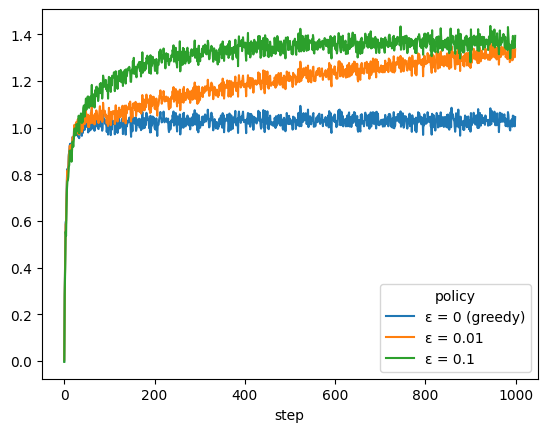

In [4]:
policy_names = {
    0: 'ε = 0.1',
    1: 'ε = 0.01',
    2: 'ε = 0 (greedy)'
}

(
    trace_df
    .assign(policy=trace_df.policy_idx.map(policy_names))
    .groupby(['step', 'policy'])
    ['reward'].mean()
    .unstack()
    .plot()
)


## Controlling the evaluation loop

The `bandit.evaluate` function is useful for benchmarking. But in practice, you'll want to have control over your bandit policy. Indeed you'll want the freedom to pull arms (with the `pull` method) and update the policy (with the `update` method) at your discretion.

As an example, the following is a possible reimplementation of the `bandit.evaluate` function. Here we'll be measuring the rate at which each policy selects the optimal arm.

Note how the `pull` and `update` methods are used.

In [5]:
import copy

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)
n_episodes = 2000

trace = []

with tqdm(total=len(policies) * n_episodes * env._max_episode_steps, position=0) as progress:
    for policy in policies:
        for episode in range(n_episodes):
            episode_policy = policy.clone()
            episode_env = copy.deepcopy(env)
            episode_env.reset()
            step = 0
            while True:
                action = episode_policy.pull(range(episode_env.action_space.n))
                observation, reward, terminated, truncated, info = episode_env.step(action)
                best_action = observation
                episode_policy.update(action, reward)

                trace.append({
                    "episode": episode,
                    "step": step,
                    "policy": f"ε = {policy.epsilon}",
                    "is_action_optimal": action == best_action
                })
                step += 1
                progress.update()

                if terminated or truncated:
                    break

trace_df = pd.DataFrame(trace)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 9982/6000000 [00:00<01:00, 99810.81it/s]

  0%|          | 20101/6000000 [00:00<00:59, 100617.19it/s]

  1%|          | 30322/6000000 [00:00<00:58, 101340.32it/s]

  1%|          | 40457/6000000 [00:00<00:58, 101343.51it/s]

  1%|          | 50636/6000000 [00:00<00:58, 101503.94it/s]

  1%|          | 60837/6000000 [00:00<00:58, 101673.39it/s]

  1%|          | 71005/6000000 [00:00<00:58, 101541.67it/s]

  1%|▏         | 81163/6000000 [00:00<00:58, 101551.81it/s]

  2%|▏         | 91386/6000000 [00:00<00:58, 101763.49it/s]

  2%|▏         | 101563/6000000 [00:01<00:57, 101711.20it/s]

  2%|▏         | 111735/6000000 [00:01<00:57, 101619.59it/s]

  2%|▏         | 121935/6000000 [00:01<00:57, 101732.49it/s]

  2%|▏         | 132109/6000000 [00:01<00:57, 101663.99it/s]

  2%|▏         | 142322/6000000 [00:01<00:57, 101803.83it/s]

  3%|▎         | 152504/6000000 [00:01<00:57, 101808.29it/s]

  3%|▎         | 162685/6000000 [00:01<00:57, 101626.96it/s]

  3%|▎         | 172848/6000000 [00:01<00:57, 101436.01it/s]

  3%|▎         | 183001/6000000 [00:01<00:57, 101397.76it/s]

  3%|▎         | 193235/6000000 [00:01<00:57, 101677.70it/s]

  3%|▎         | 203403/6000000 [00:02<00:57, 101582.87it/s]

  4%|▎         | 213590/6000000 [00:02<00:56, 101666.47it/s]

  4%|▎         | 223794/6000000 [00:02<00:56, 101776.35it/s]

  4%|▍         | 234001/6000000 [00:02<00:56, 101754.66it/s]

  4%|▍         | 244177/6000000 [00:02<00:56, 101743.57it/s]

  4%|▍         | 254352/6000000 [00:02<00:56, 101598.87it/s]

  4%|▍         | 264550/6000000 [00:02<00:56, 101711.45it/s]

  5%|▍         | 274728/6000000 [00:02<00:56, 101729.62it/s]

  5%|▍         | 284902/6000000 [00:02<00:56, 101593.29it/s]

  5%|▍         | 295062/6000000 [00:02<00:56, 101250.13it/s]

  5%|▌         | 305188/6000000 [00:03<00:56, 101223.38it/s]

  5%|▌         | 315413/6000000 [00:03<00:55, 101529.14it/s]

  5%|▌         | 325567/6000000 [00:03<00:55, 101525.32it/s]

  6%|▌         | 335728/6000000 [00:03<00:55, 101549.41it/s]

  6%|▌         | 345972/6000000 [00:03<00:55, 101814.54it/s]

  6%|▌         | 356154/6000000 [00:03<00:55, 101688.21it/s]

  6%|▌         | 366323/6000000 [00:03<00:55, 101607.64it/s]

  6%|▋         | 376596/6000000 [00:03<00:55, 101942.85it/s]

  6%|▋         | 386825/6000000 [00:03<00:55, 102046.33it/s]

  7%|▋         | 397030/6000000 [00:03<00:54, 101954.40it/s]

  7%|▋         | 407229/6000000 [00:04<00:54, 101962.70it/s]

  7%|▋         | 417434/6000000 [00:04<00:54, 101986.71it/s]

  7%|▋         | 427633/6000000 [00:04<00:54, 101917.57it/s]

  7%|▋         | 437877/6000000 [00:04<00:54, 102073.75it/s]

  7%|▋         | 448085/6000000 [00:04<00:54, 101869.29it/s]

  8%|▊         | 458298/6000000 [00:04<00:54, 101945.20it/s]

  8%|▊         | 468518/6000000 [00:04<00:54, 102020.48it/s]

  8%|▊         | 478721/6000000 [00:04<00:54, 101858.79it/s]

  8%|▊         | 488957/6000000 [00:04<00:54, 102007.97it/s]

  8%|▊         | 499158/6000000 [00:04<00:54, 101856.53it/s]

  8%|▊         | 509415/6000000 [00:05<00:53, 102069.53it/s]

  9%|▊         | 519754/6000000 [00:05<00:53, 102464.88it/s]

  9%|▉         | 530001/6000000 [00:05<00:53, 102105.57it/s]

  9%|▉         | 540212/6000000 [00:05<00:53, 101965.66it/s]

  9%|▉         | 550409/6000000 [00:05<00:53, 101894.34it/s]

  9%|▉         | 560599/6000000 [00:05<00:53, 101695.70it/s]

 10%|▉         | 570769/6000000 [00:05<00:54, 99901.67it/s] 

 10%|▉         | 580950/6000000 [00:05<00:53, 100464.65it/s]

 10%|▉         | 591110/6000000 [00:05<00:53, 100800.48it/s]

 10%|█         | 601278/6000000 [00:05<00:53, 101060.79it/s]

 10%|█         | 611429/6000000 [00:06<00:53, 101192.66it/s]

 10%|█         | 621619/6000000 [00:06<00:53, 101402.68it/s]

 11%|█         | 631796/6000000 [00:06<00:52, 101510.38it/s]

 11%|█         | 641977/6000000 [00:06<00:52, 101599.77it/s]

 11%|█         | 652138/6000000 [00:06<00:52, 101465.15it/s]

 11%|█         | 662286/6000000 [00:06<00:52, 101411.56it/s]

 11%|█         | 672482/6000000 [00:06<00:52, 101573.45it/s]

 11%|█▏        | 682677/6000000 [00:06<00:52, 101685.51it/s]

 12%|█▏        | 692869/6000000 [00:06<00:52, 101754.23it/s]

 12%|█▏        | 703045/6000000 [00:06<00:52, 101667.83it/s]

 12%|█▏        | 713234/6000000 [00:07<00:51, 101732.48it/s]

 12%|█▏        | 723422/6000000 [00:07<00:51, 101775.86it/s]

 12%|█▏        | 733600/6000000 [00:07<00:51, 101713.80it/s]

 12%|█▏        | 743772/6000000 [00:07<00:51, 101688.43it/s]

 13%|█▎        | 753941/6000000 [00:07<00:51, 101593.45it/s]

 13%|█▎        | 764101/6000000 [00:07<00:51, 101463.80it/s]

 13%|█▎        | 774248/6000000 [00:07<00:52, 99706.74it/s] 

 13%|█▎        | 784435/6000000 [00:07<00:51, 100345.56it/s]

 13%|█▎        | 794540/6000000 [00:07<00:51, 100554.22it/s]

 13%|█▎        | 804701/6000000 [00:07<00:51, 100866.09it/s]

 14%|█▎        | 814898/6000000 [00:08<00:51, 101193.44it/s]

 14%|█▍        | 825028/6000000 [00:08<00:51, 101222.23it/s]

 14%|█▍        | 835212/6000000 [00:08<00:50, 101404.84it/s]

 14%|█▍        | 845394/6000000 [00:08<00:50, 101527.84it/s]

 14%|█▍        | 855628/6000000 [00:08<00:50, 101770.00it/s]

 14%|█▍        | 865807/6000000 [00:08<00:50, 101775.44it/s]

 15%|█▍        | 875985/6000000 [00:08<00:50, 101703.33it/s]

 15%|█▍        | 886156/6000000 [00:08<00:50, 101400.81it/s]

 15%|█▍        | 896343/6000000 [00:08<00:50, 101539.11it/s]

 15%|█▌        | 906498/6000000 [00:08<00:50, 101349.44it/s]

 15%|█▌        | 916634/6000000 [00:09<00:50, 101322.99it/s]

 15%|█▌        | 926835/6000000 [00:09<00:49, 101526.23it/s]

 16%|█▌        | 936988/6000000 [00:09<00:50, 101253.39it/s]

 16%|█▌        | 947114/6000000 [00:09<00:50, 100686.83it/s]

 16%|█▌        | 957405/6000000 [00:09<00:49, 101348.31it/s]

 16%|█▌        | 967601/6000000 [00:09<00:49, 101529.41it/s]

 16%|█▋        | 977755/6000000 [00:09<00:50, 100057.06it/s]

 16%|█▋        | 987964/6000000 [00:09<00:49, 100656.78it/s]

 17%|█▋        | 998101/6000000 [00:09<00:49, 100866.35it/s]

 17%|█▋        | 1008315/6000000 [00:09<00:49, 101243.49it/s]

 17%|█▋        | 1018502/6000000 [00:10<00:49, 101427.99it/s]

 17%|█▋        | 1028647/6000000 [00:10<00:49, 101341.16it/s]

 17%|█▋        | 1038783/6000000 [00:10<00:49, 101211.83it/s]

 17%|█▋        | 1048924/6000000 [00:10<00:48, 101268.68it/s]

 18%|█▊        | 1059052/6000000 [00:10<00:48, 101209.03it/s]

 18%|█▊        | 1069212/6000000 [00:10<00:48, 101324.98it/s]

 18%|█▊        | 1079376/6000000 [00:10<00:48, 101418.37it/s]

 18%|█▊        | 1089557/6000000 [00:10<00:48, 101535.49it/s]

 18%|█▊        | 1099711/6000000 [00:10<00:48, 101514.16it/s]

 18%|█▊        | 1109863/6000000 [00:10<00:48, 101335.79it/s]

 19%|█▊        | 1120001/6000000 [00:11<00:48, 101332.56it/s]

 19%|█▉        | 1130135/6000000 [00:11<00:48, 100884.41it/s]

 19%|█▉        | 1140382/6000000 [00:11<00:47, 101357.56it/s]

 19%|█▉        | 1150594/6000000 [00:11<00:47, 101583.50it/s]

 19%|█▉        | 1160836/6000000 [00:11<00:47, 101833.84it/s]

 20%|█▉        | 1171020/6000000 [00:11<00:47, 101591.61it/s]

 20%|█▉        | 1181180/6000000 [00:11<00:48, 99903.76it/s] 

 20%|█▉        | 1191490/6000000 [00:11<00:47, 100848.39it/s]

 20%|██        | 1201698/6000000 [00:11<00:47, 101211.94it/s]

 20%|██        | 1211927/6000000 [00:11<00:47, 101530.62it/s]

 20%|██        | 1222084/6000000 [00:12<00:47, 100849.82it/s]

 21%|██        | 1232172/6000000 [00:12<00:47, 100748.40it/s]

 21%|██        | 1242265/6000000 [00:12<00:47, 100801.91it/s]

 21%|██        | 1252347/6000000 [00:12<00:47, 100647.18it/s]

 21%|██        | 1262424/6000000 [00:12<00:47, 100681.17it/s]

 21%|██        | 1272493/6000000 [00:12<00:46, 100616.11it/s]

 21%|██▏       | 1282556/6000000 [00:12<00:47, 98888.42it/s] 

 22%|██▏       | 1292587/6000000 [00:12<00:47, 99306.96it/s]

 22%|██▏       | 1302604/6000000 [00:12<00:47, 99562.73it/s]

 22%|██▏       | 1312672/6000000 [00:12<00:46, 99893.58it/s]

 22%|██▏       | 1322697/6000000 [00:13<00:46, 99996.88it/s]

 22%|██▏       | 1332699/6000000 [00:13<00:46, 99991.42it/s]

 22%|██▏       | 1342700/6000000 [00:13<00:46, 99983.95it/s]

 23%|██▎       | 1352741/6000000 [00:13<00:46, 100110.78it/s]

 23%|██▎       | 1362793/6000000 [00:13<00:46, 100233.06it/s]

 23%|██▎       | 1372817/6000000 [00:13<00:46, 100157.01it/s]

 23%|██▎       | 1382834/6000000 [00:13<00:46, 100034.44it/s]

 23%|██▎       | 1392885/6000000 [00:13<00:45, 100174.24it/s]

 23%|██▎       | 1402903/6000000 [00:13<00:45, 100139.44it/s]

 24%|██▎       | 1412918/6000000 [00:13<00:45, 100134.91it/s]

 24%|██▎       | 1422932/6000000 [00:14<00:45, 100024.59it/s]

 24%|██▍       | 1433001/6000000 [00:14<00:45, 100079.93it/s]

 24%|██▍       | 1443077/6000000 [00:14<00:45, 100281.36it/s]

 24%|██▍       | 1453106/6000000 [00:14<00:45, 100222.91it/s]

 24%|██▍       | 1463129/6000000 [00:14<00:45, 100217.33it/s]

 25%|██▍       | 1473151/6000000 [00:14<00:45, 100010.43it/s]

 25%|██▍       | 1483153/6000000 [00:14<00:45, 98573.08it/s] 

 25%|██▍       | 1493129/6000000 [00:14<00:45, 98921.69it/s]

 25%|██▌       | 1503227/6000000 [00:14<00:45, 99531.96it/s]

 25%|██▌       | 1513311/6000000 [00:14<00:44, 99920.15it/s]

 25%|██▌       | 1523369/6000000 [00:15<00:44, 100115.40it/s]

 26%|██▌       | 1533383/6000000 [00:15<00:44, 99923.03it/s] 

 26%|██▌       | 1543422/6000000 [00:15<00:44, 100060.03it/s]

 26%|██▌       | 1553429/6000000 [00:15<00:44, 100018.58it/s]

 26%|██▌       | 1563482/6000000 [00:15<00:44, 100170.87it/s]

 26%|██▌       | 1573545/6000000 [00:15<00:44, 100308.02it/s]

 26%|██▋       | 1583577/6000000 [00:15<00:44, 100309.34it/s]

 27%|██▋       | 1593609/6000000 [00:15<00:44, 98369.97it/s] 

 27%|██▋       | 1603613/6000000 [00:15<00:44, 98862.53it/s]

 27%|██▋       | 1613667/6000000 [00:15<00:44, 99358.55it/s]

 27%|██▋       | 1623710/6000000 [00:16<00:43, 99676.21it/s]

 27%|██▋       | 1633724/6000000 [00:16<00:43, 99814.33it/s]

 27%|██▋       | 1643721/6000000 [00:16<00:43, 99858.98it/s]

 28%|██▊       | 1653735/6000000 [00:16<00:43, 99940.76it/s]

 28%|██▊       | 1663736/6000000 [00:16<00:43, 99958.88it/s]

 28%|██▊       | 1673733/6000000 [00:16<00:43, 99874.98it/s]

 28%|██▊       | 1683758/6000000 [00:16<00:43, 99987.07it/s]

 28%|██▊       | 1693782/6000000 [00:16<00:43, 100062.47it/s]

 28%|██▊       | 1703789/6000000 [00:16<00:42, 99927.77it/s] 

 29%|██▊       | 1713789/6000000 [00:16<00:42, 99949.22it/s]

 29%|██▊       | 1723785/6000000 [00:17<00:42, 99816.97it/s]

 29%|██▉       | 1733767/6000000 [00:17<00:42, 99679.82it/s]

 29%|██▉       | 1743781/6000000 [00:17<00:42, 99815.54it/s]

 29%|██▉       | 1753763/6000000 [00:17<00:42, 99811.27it/s]

 29%|██▉       | 1763793/6000000 [00:17<00:42, 99956.12it/s]

 30%|██▉       | 1773823/6000000 [00:17<00:42, 100057.01it/s]

 30%|██▉       | 1783829/6000000 [00:17<00:42, 99936.06it/s] 

 30%|██▉       | 1793823/6000000 [00:17<00:42, 98126.22it/s]

 30%|███       | 1803821/6000000 [00:17<00:42, 98674.74it/s]

 30%|███       | 1813766/6000000 [00:17<00:42, 98904.56it/s]

 30%|███       | 1823781/6000000 [00:18<00:42, 99274.51it/s]

 31%|███       | 1833786/6000000 [00:18<00:41, 99504.31it/s]

 31%|███       | 1843785/6000000 [00:18<00:41, 99649.28it/s]

 31%|███       | 1853864/6000000 [00:18<00:41, 99990.01it/s]

 31%|███       | 1863917/6000000 [00:18<00:41, 100149.63it/s]

 31%|███       | 1873972/6000000 [00:18<00:41, 100267.41it/s]

 31%|███▏      | 1884000/6000000 [00:18<00:41, 100168.77it/s]

 32%|███▏      | 1894018/6000000 [00:18<00:41, 100029.68it/s]

 32%|███▏      | 1904022/6000000 [00:18<00:40, 99907.06it/s] 

 32%|███▏      | 1914105/6000000 [00:18<00:40, 100182.71it/s]

 32%|███▏      | 1924133/6000000 [00:19<00:40, 100211.17it/s]

 32%|███▏      | 1934155/6000000 [00:19<00:40, 100202.96it/s]

 32%|███▏      | 1944254/6000000 [00:19<00:40, 100438.40it/s]

 33%|███▎      | 1954338/6000000 [00:19<00:40, 100556.90it/s]

 33%|███▎      | 1964409/6000000 [00:19<00:40, 100602.69it/s]

 33%|███▎      | 1974494/6000000 [00:19<00:39, 100675.24it/s]

 33%|███▎      | 1984577/6000000 [00:19<00:39, 100719.81it/s]

 33%|███▎      | 1994650/6000000 [00:19<00:39, 100383.77it/s]

 33%|███▎      | 2004689/6000000 [00:19<00:40, 99667.30it/s] 

 34%|███▎      | 2014657/6000000 [00:19<00:40, 97612.89it/s]

 34%|███▎      | 2024428/6000000 [00:20<00:41, 96614.37it/s]

 34%|███▍      | 2034097/6000000 [00:20<00:41, 95897.39it/s]

 34%|███▍      | 2043692/6000000 [00:20<00:41, 95219.43it/s]

 34%|███▍      | 2053217/6000000 [00:20<00:41, 94556.25it/s]

 34%|███▍      | 2062682/6000000 [00:20<00:41, 94583.82it/s]

 35%|███▍      | 2072142/6000000 [00:20<00:41, 94432.36it/s]

 35%|███▍      | 2081587/6000000 [00:20<00:41, 94431.08it/s]

 35%|███▍      | 2091031/6000000 [00:20<00:41, 93600.70it/s]

 35%|███▌      | 2100415/6000000 [00:20<00:41, 93670.92it/s]

 35%|███▌      | 2109843/6000000 [00:21<00:41, 93852.09it/s]

 35%|███▌      | 2119230/6000000 [00:21<00:41, 93489.66it/s]

 35%|███▌      | 2128580/6000000 [00:21<00:41, 93479.62it/s]

 36%|███▌      | 2138017/6000000 [00:21<00:41, 93744.62it/s]

 36%|███▌      | 2147392/6000000 [00:21<00:41, 92928.52it/s]

 36%|███▌      | 2156779/6000000 [00:21<00:41, 93207.68it/s]

 36%|███▌      | 2166171/6000000 [00:21<00:41, 93411.23it/s]

 36%|███▋      | 2175558/6000000 [00:21<00:40, 93547.37it/s]

 36%|███▋      | 2184914/6000000 [00:21<00:40, 93428.65it/s]

 37%|███▋      | 2194258/6000000 [00:21<00:40, 93319.07it/s]

 37%|███▋      | 2203741/6000000 [00:22<00:40, 93768.90it/s]

 37%|███▋      | 2213119/6000000 [00:22<00:40, 93555.16it/s]

 37%|███▋      | 2222542/6000000 [00:22<00:40, 93754.28it/s]

 37%|███▋      | 2231927/6000000 [00:22<00:40, 93781.15it/s]

 37%|███▋      | 2241306/6000000 [00:22<00:40, 93742.45it/s]

 38%|███▊      | 2250681/6000000 [00:22<00:40, 93629.65it/s]

 38%|███▊      | 2260091/6000000 [00:22<00:39, 93767.91it/s]

 38%|███▊      | 2269501/6000000 [00:22<00:39, 93865.22it/s]

 38%|███▊      | 2278912/6000000 [00:22<00:39, 93937.81it/s]

 38%|███▊      | 2288306/6000000 [00:22<00:39, 93898.02it/s]

 38%|███▊      | 2297696/6000000 [00:23<00:39, 93698.81it/s]

 38%|███▊      | 2307094/6000000 [00:23<00:39, 93781.08it/s]

 39%|███▊      | 2316555/6000000 [00:23<00:39, 94028.96it/s]

 39%|███▉      | 2326001/6000000 [00:23<00:39, 94156.42it/s]

 39%|███▉      | 2335417/6000000 [00:23<00:39, 93808.46it/s]

 39%|███▉      | 2344799/6000000 [00:23<00:38, 93773.63it/s]

 39%|███▉      | 2354177/6000000 [00:23<00:38, 93737.30it/s]

 39%|███▉      | 2363563/6000000 [00:23<00:38, 93771.92it/s]

 40%|███▉      | 2372941/6000000 [00:23<00:39, 92170.19it/s]

 40%|███▉      | 2382340/6000000 [00:23<00:39, 92706.49it/s]

 40%|███▉      | 2391771/6000000 [00:24<00:38, 93181.05it/s]

 40%|████      | 2401342/6000000 [00:24<00:38, 93932.59it/s]

 40%|████      | 2410819/6000000 [00:24<00:38, 94182.63it/s]

 40%|████      | 2420240/6000000 [00:24<00:38, 93830.59it/s]

 40%|████      | 2429625/6000000 [00:24<00:38, 93693.77it/s]

 41%|████      | 2438996/6000000 [00:24<00:38, 93629.91it/s]

 41%|████      | 2448360/6000000 [00:24<00:38, 93341.01it/s]

 41%|████      | 2457849/6000000 [00:24<00:37, 93803.12it/s]

 41%|████      | 2467277/6000000 [00:24<00:37, 93942.99it/s]

 41%|████▏     | 2476710/6000000 [00:24<00:37, 94056.70it/s]

 41%|████▏     | 2486229/6000000 [00:25<00:37, 94396.01it/s]

 42%|████▏     | 2495669/6000000 [00:25<00:37, 94299.21it/s]

 42%|████▏     | 2505100/6000000 [00:25<00:37, 94182.88it/s]

 42%|████▏     | 2514519/6000000 [00:25<00:37, 93918.88it/s]

 42%|████▏     | 2523995/6000000 [00:25<00:36, 94166.57it/s]

 42%|████▏     | 2533412/6000000 [00:25<00:36, 94076.86it/s]

 42%|████▏     | 2542827/6000000 [00:25<00:36, 94097.24it/s]

 43%|████▎     | 2552237/6000000 [00:25<00:36, 93938.17it/s]

 43%|████▎     | 2561631/6000000 [00:25<00:37, 91359.11it/s]

 43%|████▎     | 2571067/6000000 [00:25<00:37, 92238.16it/s]

 43%|████▎     | 2580542/6000000 [00:26<00:36, 92979.20it/s]

 43%|████▎     | 2589850/6000000 [00:26<00:36, 92927.46it/s]

 43%|████▎     | 2599167/6000000 [00:26<00:36, 92999.41it/s]

 43%|████▎     | 2608541/6000000 [00:26<00:36, 93219.84it/s]

 44%|████▎     | 2618001/6000000 [00:26<00:36, 93513.31it/s]

 44%|████▍     | 2627355/6000000 [00:26<00:36, 93060.52it/s]

 44%|████▍     | 2636809/6000000 [00:26<00:35, 93499.80it/s]

 44%|████▍     | 2646240/6000000 [00:26<00:35, 93740.66it/s]

 44%|████▍     | 2655665/6000000 [00:26<00:35, 93891.97it/s]

 44%|████▍     | 2665060/6000000 [00:26<00:35, 93907.69it/s]

 45%|████▍     | 2674452/6000000 [00:27<00:35, 93672.37it/s]

 45%|████▍     | 2683820/6000000 [00:27<00:35, 93522.92it/s]

 45%|████▍     | 2693223/6000000 [00:27<00:35, 93673.47it/s]

 45%|████▌     | 2702598/6000000 [00:27<00:35, 93695.47it/s]

 45%|████▌     | 2712098/6000000 [00:27<00:34, 94084.64it/s]

 45%|████▌     | 2721507/6000000 [00:27<00:34, 94054.69it/s]

 46%|████▌     | 2730913/6000000 [00:27<00:34, 93874.86it/s]

 46%|████▌     | 2740301/6000000 [00:27<00:34, 93721.43it/s]

 46%|████▌     | 2749699/6000000 [00:27<00:34, 93796.42it/s]

 46%|████▌     | 2759079/6000000 [00:27<00:35, 91388.23it/s]

 46%|████▌     | 2768578/6000000 [00:28<00:34, 92445.76it/s]

 46%|████▋     | 2778079/6000000 [00:28<00:34, 93202.31it/s]

 46%|████▋     | 2787532/6000000 [00:28<00:34, 93596.08it/s]

 47%|████▋     | 2796909/6000000 [00:28<00:34, 93645.27it/s]

 47%|████▋     | 2806279/6000000 [00:28<00:34, 93187.87it/s]

 47%|████▋     | 2815768/6000000 [00:28<00:33, 93694.36it/s]

 47%|████▋     | 2825307/6000000 [00:28<00:33, 94198.61it/s]

 47%|████▋     | 2834745/6000000 [00:28<00:33, 94250.92it/s]

 47%|████▋     | 2844172/6000000 [00:28<00:33, 94051.23it/s]

 48%|████▊     | 2853579/6000000 [00:28<00:33, 93676.38it/s]

 48%|████▊     | 2863001/6000000 [00:29<00:33, 93723.82it/s]

 48%|████▊     | 2872510/6000000 [00:29<00:33, 94129.21it/s]

 48%|████▊     | 2881986/6000000 [00:29<00:33, 94317.01it/s]

 48%|████▊     | 2891419/6000000 [00:29<00:33, 93581.38it/s]

 48%|████▊     | 2900779/6000000 [00:29<00:33, 93509.45it/s]

 49%|████▊     | 2910131/6000000 [00:29<00:33, 93324.10it/s]

 49%|████▊     | 2919645/6000000 [00:29<00:32, 93863.55it/s]

 49%|████▉     | 2929102/6000000 [00:29<00:32, 94073.99it/s]

 49%|████▉     | 2938613/6000000 [00:29<00:32, 94381.45it/s]

 49%|████▉     | 2948052/6000000 [00:29<00:32, 93948.73it/s]

 49%|████▉     | 2957448/6000000 [00:30<00:32, 93807.38it/s]

 49%|████▉     | 2966830/6000000 [00:30<00:32, 93741.28it/s]

 50%|████▉     | 2976205/6000000 [00:30<00:32, 93684.88it/s]

 50%|████▉     | 2985574/6000000 [00:30<00:32, 92990.48it/s]

 50%|████▉     | 2995001/6000000 [00:30<00:32, 93260.60it/s]

 50%|█████     | 3004537/6000000 [00:30<00:31, 93884.19it/s]

 50%|█████     | 3013948/6000000 [00:30<00:31, 93950.47it/s]

 50%|█████     | 3023344/6000000 [00:30<00:31, 93450.24it/s]

 51%|█████     | 3032718/6000000 [00:30<00:31, 93534.17it/s]

 51%|█████     | 3042073/6000000 [00:30<00:32, 90857.72it/s]

 51%|█████     | 3051176/6000000 [00:31<00:32, 90724.58it/s]

 51%|█████     | 3060416/6000000 [00:31<00:32, 91217.78it/s]

 51%|█████     | 3069799/6000000 [00:31<00:31, 91989.52it/s]

 51%|█████▏    | 3079006/6000000 [00:31<00:31, 91585.18it/s]

 51%|█████▏    | 3088170/6000000 [00:31<00:31, 91550.51it/s]

 52%|█████▏    | 3097523/6000000 [00:31<00:31, 92138.99it/s]

 52%|█████▏    | 3106912/6000000 [00:31<00:31, 92661.41it/s]

 52%|█████▏    | 3116181/6000000 [00:31<00:31, 92598.57it/s]

 52%|█████▏    | 3125705/6000000 [00:31<00:30, 93387.29it/s]

 52%|█████▏    | 3135046/6000000 [00:31<00:31, 90498.51it/s]

 52%|█████▏    | 3144475/6000000 [00:32<00:31, 91608.47it/s]

 53%|█████▎    | 3153875/6000000 [00:32<00:30, 92313.88it/s]

 53%|█████▎    | 3163148/6000000 [00:32<00:30, 92435.67it/s]

 53%|█████▎    | 3172613/6000000 [00:32<00:30, 93093.92it/s]

 53%|█████▎    | 3181982/6000000 [00:32<00:30, 93269.23it/s]

 53%|█████▎    | 3191415/6000000 [00:32<00:30, 93584.94it/s]

 53%|█████▎    | 3200866/6000000 [00:32<00:29, 93859.82it/s]

 54%|█████▎    | 3210255/6000000 [00:32<00:29, 93583.64it/s]

 54%|█████▎    | 3219616/6000000 [00:32<00:29, 93477.42it/s]

 54%|█████▍    | 3229001/6000000 [00:32<00:29, 93429.60it/s]

 54%|█████▍    | 3238516/6000000 [00:33<00:29, 93941.25it/s]

 54%|█████▍    | 3247911/6000000 [00:33<00:29, 93682.22it/s]

 54%|█████▍    | 3257280/6000000 [00:33<00:29, 92393.95it/s]

 54%|█████▍    | 3266635/6000000 [00:33<00:29, 92736.01it/s]

 55%|█████▍    | 3276001/6000000 [00:33<00:29, 93009.60it/s]

 55%|█████▍    | 3285398/6000000 [00:33<00:29, 93293.28it/s]

 55%|█████▍    | 3294803/6000000 [00:33<00:28, 93518.75it/s]

 55%|█████▌    | 3304157/6000000 [00:33<00:28, 93448.77it/s]

 55%|█████▌    | 3313716/6000000 [00:33<00:28, 94088.44it/s]

 55%|█████▌    | 3323126/6000000 [00:34<00:29, 92116.21it/s]

 56%|█████▌    | 3332727/6000000 [00:34<00:28, 93263.74it/s]

 56%|█████▌    | 3342108/6000000 [00:34<00:28, 93424.53it/s]

 56%|█████▌    | 3351457/6000000 [00:34<00:28, 93223.37it/s]

 56%|█████▌    | 3360876/6000000 [00:34<00:28, 93510.16it/s]

 56%|█████▌    | 3370231/6000000 [00:34<00:28, 93347.57it/s]

 56%|█████▋    | 3379568/6000000 [00:34<00:28, 93069.97it/s]

 56%|█████▋    | 3389001/6000000 [00:34<00:27, 93402.46it/s]

 57%|█████▋    | 3398343/6000000 [00:34<00:28, 92813.04it/s]

 57%|█████▋    | 3407651/6000000 [00:34<00:27, 92891.57it/s]

 57%|█████▋    | 3417081/6000000 [00:35<00:27, 93311.13it/s]

 57%|█████▋    | 3426599/6000000 [00:35<00:27, 93869.10it/s]

 57%|█████▋    | 3435987/6000000 [00:35<00:27, 93297.90it/s]

 57%|█████▋    | 3445319/6000000 [00:35<00:27, 93190.37it/s]

 58%|█████▊    | 3454690/6000000 [00:35<00:27, 93344.29it/s]

 58%|█████▊    | 3464145/6000000 [00:35<00:27, 93702.59it/s]

 58%|█████▊    | 3473516/6000000 [00:35<00:27, 93550.79it/s]

 58%|█████▊    | 3482901/6000000 [00:35<00:26, 93638.78it/s]

 58%|█████▊    | 3492266/6000000 [00:35<00:26, 93419.59it/s]

 58%|█████▊    | 3501678/6000000 [00:35<00:26, 93628.75it/s]

 59%|█████▊    | 3511042/6000000 [00:36<00:26, 93164.91it/s]

 59%|█████▊    | 3520463/6000000 [00:36<00:26, 93475.36it/s]

 59%|█████▉    | 3529865/6000000 [00:36<00:26, 93637.13it/s]

 59%|█████▉    | 3539230/6000000 [00:36<00:26, 93299.65it/s]

 59%|█████▉    | 3548667/6000000 [00:36<00:26, 93618.07it/s]

 59%|█████▉    | 3558030/6000000 [00:36<00:26, 93488.60it/s]

 59%|█████▉    | 3567380/6000000 [00:36<00:26, 93313.52it/s]

 60%|█████▉    | 3576847/6000000 [00:36<00:25, 93717.39it/s]

 60%|█████▉    | 3586220/6000000 [00:36<00:25, 93517.95it/s]

 60%|█████▉    | 3595856/6000000 [00:36<00:25, 94367.55it/s]

 60%|██████    | 3605294/6000000 [00:37<00:25, 94213.44it/s]

 60%|██████    | 3614716/6000000 [00:37<00:25, 94023.83it/s]

 60%|██████    | 3624119/6000000 [00:37<00:25, 94009.95it/s]

 61%|██████    | 3633576/6000000 [00:37<00:25, 94175.56it/s]

 61%|██████    | 3643001/6000000 [00:37<00:25, 94099.11it/s]

 61%|██████    | 3652412/6000000 [00:37<00:25, 93635.11it/s]

 61%|██████    | 3661851/6000000 [00:37<00:24, 93859.90it/s]

 61%|██████    | 3671238/6000000 [00:37<00:24, 93647.47it/s]

 61%|██████▏   | 3680712/6000000 [00:37<00:24, 93973.74it/s]

 62%|██████▏   | 3690110/6000000 [00:37<00:24, 93781.13it/s]

 62%|██████▏   | 3699519/6000000 [00:38<00:24, 93871.23it/s]

 62%|██████▏   | 3708907/6000000 [00:38<00:25, 91016.68it/s]

 62%|██████▏   | 3718218/6000000 [00:38<00:24, 91629.32it/s]

 62%|██████▏   | 3727546/6000000 [00:38<00:24, 92115.23it/s]

 62%|██████▏   | 3736820/6000000 [00:38<00:24, 92300.08it/s]

 62%|██████▏   | 3746241/6000000 [00:38<00:24, 92867.39it/s]

 63%|██████▎   | 3755665/6000000 [00:38<00:24, 93275.01it/s]

 63%|██████▎   | 3764997/6000000 [00:38<00:23, 93194.80it/s]

 63%|██████▎   | 3774320/6000000 [00:38<00:23, 93052.61it/s]

 63%|██████▎   | 3783628/6000000 [00:38<00:23, 93044.11it/s]

 63%|██████▎   | 3793015/6000000 [00:39<00:23, 93289.05it/s]

 63%|██████▎   | 3802346/6000000 [00:39<00:23, 93098.28it/s]

 64%|██████▎   | 3811793/6000000 [00:39<00:23, 93508.41it/s]

 64%|██████▎   | 3821220/6000000 [00:39<00:23, 93736.13it/s]

 64%|██████▍   | 3830595/6000000 [00:39<00:23, 93624.16it/s]

 64%|██████▍   | 3840001/6000000 [00:39<00:23, 93682.33it/s]

 64%|██████▍   | 3849451/6000000 [00:39<00:22, 93925.80it/s]

 64%|██████▍   | 3858844/6000000 [00:39<00:22, 93805.47it/s]

 64%|██████▍   | 3868228/6000000 [00:39<00:22, 93813.62it/s]

 65%|██████▍   | 3877661/6000000 [00:39<00:22, 93967.09it/s]

 65%|██████▍   | 3887058/6000000 [00:40<00:22, 93926.98it/s]

 65%|██████▍   | 3896451/6000000 [00:40<00:22, 92464.97it/s]

 65%|██████▌   | 3906001/6000000 [00:40<00:22, 93182.72it/s]

 65%|██████▌   | 3915324/6000000 [00:40<00:22, 93066.97it/s]

 65%|██████▌   | 3924764/6000000 [00:40<00:22, 93463.12it/s]

 66%|██████▌   | 3934162/6000000 [00:40<00:22, 93615.78it/s]

 66%|██████▌   | 3943526/6000000 [00:40<00:21, 93540.99it/s]

 66%|██████▌   | 3952882/6000000 [00:40<00:21, 93413.05it/s]

 66%|██████▌   | 3962225/6000000 [00:40<00:21, 93167.80it/s]

 66%|██████▌   | 3971663/6000000 [00:40<00:21, 93529.64it/s]

 66%|██████▋   | 3981017/6000000 [00:41<00:21, 93069.48it/s]

 67%|██████▋   | 3990325/6000000 [00:41<00:21, 92284.93it/s]

 67%|██████▋   | 3999632/6000000 [00:41<00:21, 92516.86it/s]

 67%|██████▋   | 4009054/6000000 [00:41<00:21, 93022.99it/s]

 67%|██████▋   | 4018358/6000000 [00:41<00:21, 92965.89it/s]

 67%|██████▋   | 4027805/6000000 [00:41<00:21, 93413.34it/s]

 67%|██████▋   | 4037218/6000000 [00:41<00:20, 93627.25it/s]

 67%|██████▋   | 4046640/6000000 [00:41<00:20, 93802.15it/s]

 68%|██████▊   | 4056021/6000000 [00:41<00:20, 93775.26it/s]

 68%|██████▊   | 4065854/6000000 [00:41<00:20, 95138.41it/s]

 68%|██████▊   | 4075437/6000000 [00:42<00:20, 95344.93it/s]

 68%|██████▊   | 4084972/6000000 [00:42<00:20, 93360.17it/s]

 68%|██████▊   | 4094581/6000000 [00:42<00:20, 94164.34it/s]

 68%|██████▊   | 4104110/6000000 [00:42<00:20, 94496.14it/s]

 69%|██████▊   | 4113603/6000000 [00:42<00:19, 94623.34it/s]

 69%|██████▊   | 4123070/6000000 [00:42<00:19, 94590.51it/s]

 69%|██████▉   | 4132551/6000000 [00:42<00:19, 94654.84it/s]

 69%|██████▉   | 4142229/6000000 [00:42<00:19, 95288.50it/s]

 69%|██████▉   | 4151782/6000000 [00:42<00:19, 95360.36it/s]

 69%|██████▉   | 4161320/6000000 [00:42<00:19, 95262.37it/s]

 70%|██████▉   | 4171001/6000000 [00:43<00:19, 95652.46it/s]

 70%|██████▉   | 4180567/6000000 [00:43<00:19, 95375.75it/s]

 70%|██████▉   | 4190289/6000000 [00:43<00:18, 95924.57it/s]

 70%|██████▉   | 4199883/6000000 [00:43<00:18, 95803.42it/s]

 70%|███████   | 4209538/6000000 [00:43<00:18, 96023.98it/s]

 70%|███████   | 4219141/6000000 [00:43<00:18, 95777.17it/s]

 70%|███████   | 4228720/6000000 [00:43<00:18, 95422.18it/s]

 71%|███████   | 4238285/6000000 [00:43<00:18, 95489.55it/s]

 71%|███████   | 4247835/6000000 [00:43<00:18, 95314.14it/s]

 71%|███████   | 4257386/6000000 [00:43<00:18, 95370.20it/s]

 71%|███████   | 4267001/6000000 [00:44<00:18, 95547.80it/s]

 71%|███████▏  | 4276556/6000000 [00:44<00:18, 95441.68it/s]

 71%|███████▏  | 4286101/6000000 [00:44<00:18, 95043.44it/s]

 72%|███████▏  | 4295808/6000000 [00:44<00:17, 95646.41it/s]

 72%|███████▏  | 4305374/6000000 [00:44<00:17, 95454.44it/s]

 72%|███████▏  | 4314924/6000000 [00:44<00:17, 95466.52it/s]

 72%|███████▏  | 4324623/6000000 [00:44<00:17, 95919.60it/s]

 72%|███████▏  | 4334216/6000000 [00:44<00:17, 95700.41it/s]

 72%|███████▏  | 4343911/6000000 [00:44<00:17, 96072.72it/s]

 73%|███████▎  | 4353519/6000000 [00:44<00:17, 96058.81it/s]

 73%|███████▎  | 4363126/6000000 [00:45<00:17, 95791.97it/s]

 73%|███████▎  | 4372706/6000000 [00:45<00:17, 95664.45it/s]

 73%|███████▎  | 4382273/6000000 [00:45<00:17, 94004.74it/s]

 73%|███████▎  | 4391897/6000000 [00:45<00:16, 94663.77it/s]

 73%|███████▎  | 4401369/6000000 [00:45<00:16, 94442.18it/s]

 74%|███████▎  | 4410899/6000000 [00:45<00:16, 94696.20it/s]

 74%|███████▎  | 4420372/6000000 [00:45<00:16, 94683.83it/s]

 74%|███████▍  | 4430001/6000000 [00:45<00:16, 95156.20it/s]

 74%|███████▍  | 4439653/6000000 [00:45<00:16, 95562.21it/s]

 74%|███████▍  | 4449211/6000000 [00:45<00:16, 95219.79it/s]

 74%|███████▍  | 4458770/6000000 [00:46<00:16, 95328.04it/s]

 74%|███████▍  | 4468304/6000000 [00:46<00:16, 95080.55it/s]

 75%|███████▍  | 4477813/6000000 [00:46<00:16, 92061.85it/s]

 75%|███████▍  | 4487385/6000000 [00:46<00:16, 93130.30it/s]

 75%|███████▍  | 4496948/6000000 [00:46<00:16, 93864.15it/s]

 75%|███████▌  | 4506581/6000000 [00:46<00:15, 94592.94it/s]

 75%|███████▌  | 4516051/6000000 [00:46<00:15, 94608.71it/s]

 75%|███████▌  | 4525572/6000000 [00:46<00:15, 94787.78it/s]

 76%|███████▌  | 4535136/6000000 [00:46<00:15, 95042.14it/s]

 76%|███████▌  | 4544858/6000000 [00:46<00:15, 95693.09it/s]

 76%|███████▌  | 4554431/6000000 [00:47<00:15, 95362.03it/s]

 76%|███████▌  | 4564001/6000000 [00:47<00:15, 95436.93it/s]

 76%|███████▌  | 4573547/6000000 [00:47<00:15, 93222.07it/s]

 76%|███████▋  | 4583160/6000000 [00:47<00:15, 94077.02it/s]

 77%|███████▋  | 4592765/6000000 [00:47<00:14, 94660.29it/s]

 77%|███████▋  | 4602330/6000000 [00:47<00:14, 94951.68it/s]

 77%|███████▋  | 4611946/6000000 [00:47<00:14, 95309.43it/s]

 77%|███████▋  | 4621607/6000000 [00:47<00:14, 95695.81it/s]

 77%|███████▋  | 4631180/6000000 [00:47<00:14, 95504.37it/s]

 77%|███████▋  | 4640834/6000000 [00:47<00:14, 95812.57it/s]

 78%|███████▊  | 4650481/6000000 [00:48<00:14, 96007.12it/s]

 78%|███████▊  | 4660083/6000000 [00:48<00:13, 95839.81it/s]

 78%|███████▊  | 4669720/6000000 [00:48<00:13, 95996.57it/s]

 78%|███████▊  | 4679321/6000000 [00:48<00:13, 95885.20it/s]

 78%|███████▊  | 4688932/6000000 [00:48<00:13, 95951.22it/s]

 78%|███████▊  | 4698528/6000000 [00:48<00:13, 95948.53it/s]

 78%|███████▊  | 4708124/6000000 [00:48<00:13, 95474.42it/s]

 79%|███████▊  | 4717673/6000000 [00:48<00:13, 95072.49it/s]

 79%|███████▉  | 4727181/6000000 [00:48<00:13, 95027.12it/s]

 79%|███████▉  | 4736908/6000000 [00:48<00:13, 95696.29it/s]

 79%|███████▉  | 4746479/6000000 [00:49<00:13, 95205.10it/s]

 79%|███████▉  | 4756001/6000000 [00:49<00:13, 95151.18it/s]

 79%|███████▉  | 4765640/6000000 [00:49<00:12, 95520.42it/s]

 80%|███████▉  | 4775193/6000000 [00:49<00:12, 95431.25it/s]

 80%|███████▉  | 4784737/6000000 [00:49<00:12, 95392.47it/s]

 80%|███████▉  | 4794277/6000000 [00:49<00:12, 95381.14it/s]

 80%|████████  | 4803816/6000000 [00:49<00:12, 94961.60it/s]

 80%|████████  | 4813335/6000000 [00:49<00:12, 95021.19it/s]

 80%|████████  | 4822838/6000000 [00:49<00:12, 94465.12it/s]

 81%|████████  | 4832286/6000000 [00:50<00:12, 94131.04it/s]

 81%|████████  | 4841889/6000000 [00:50<00:12, 94696.08it/s]

 81%|████████  | 4851460/6000000 [00:50<00:12, 94998.60it/s]

 81%|████████  | 4860961/6000000 [00:50<00:11, 94978.00it/s]

 81%|████████  | 4870460/6000000 [00:50<00:11, 94734.86it/s]

 81%|████████▏ | 4880001/6000000 [00:50<00:11, 94760.84it/s]

 81%|████████▏ | 4889478/6000000 [00:50<00:11, 94690.20it/s]

 82%|████████▏ | 4899001/6000000 [00:50<00:11, 94685.45it/s]

 82%|████████▏ | 4908470/6000000 [00:50<00:11, 94433.69it/s]

 82%|████████▏ | 4918010/6000000 [00:50<00:11, 94719.59it/s]

 82%|████████▏ | 4927624/6000000 [00:51<00:11, 95141.87it/s]

 82%|████████▏ | 4937139/6000000 [00:51<00:11, 94862.94it/s]

 82%|████████▏ | 4946626/6000000 [00:51<00:11, 94774.77it/s]

 83%|████████▎ | 4956105/6000000 [00:51<00:11, 94776.45it/s]

 83%|████████▎ | 4965583/6000000 [00:51<00:10, 94602.88it/s]

 83%|████████▎ | 4975075/6000000 [00:51<00:10, 94695.81it/s]

 83%|████████▎ | 4984626/6000000 [00:51<00:10, 94936.08it/s]

 83%|████████▎ | 4994245/6000000 [00:51<00:10, 95310.72it/s]

 83%|████████▎ | 5003777/6000000 [00:51<00:10, 95272.41it/s]

 84%|████████▎ | 5013305/6000000 [00:51<00:10, 94922.23it/s]

 84%|████████▎ | 5023001/6000000 [00:52<00:10, 95408.12it/s]

 84%|████████▍ | 5032712/6000000 [00:52<00:10, 95916.59it/s]

 84%|████████▍ | 5042304/6000000 [00:52<00:10, 95483.85it/s]

 84%|████████▍ | 5052001/6000000 [00:52<00:09, 95864.48it/s]

 84%|████████▍ | 5061588/6000000 [00:52<00:10, 90769.26it/s]

 85%|████████▍ | 5071015/6000000 [00:52<00:10, 91776.87it/s]

 85%|████████▍ | 5080380/6000000 [00:52<00:09, 92322.62it/s]

 85%|████████▍ | 5089971/6000000 [00:52<00:09, 93374.41it/s]

 85%|████████▍ | 5099428/6000000 [00:52<00:09, 93727.01it/s]

 85%|████████▌ | 5108933/6000000 [00:52<00:09, 94119.42it/s]

 85%|████████▌ | 5118365/6000000 [00:53<00:09, 94178.66it/s]

 85%|████████▌ | 5127957/6000000 [00:53<00:09, 94696.62it/s]

 86%|████████▌ | 5137434/6000000 [00:53<00:09, 94284.59it/s]

 86%|████████▌ | 5146943/6000000 [00:53<00:09, 94523.53it/s]

 86%|████████▌ | 5156399/6000000 [00:53<00:09, 90477.30it/s]

 86%|████████▌ | 5165728/6000000 [00:53<00:09, 91292.39it/s]

 86%|████████▋ | 5175251/6000000 [00:53<00:08, 92445.67it/s]

 86%|████████▋ | 5184775/6000000 [00:53<00:08, 93268.10it/s]

 87%|████████▋ | 5194217/6000000 [00:53<00:08, 93609.27it/s]

 87%|████████▋ | 5203804/6000000 [00:53<00:08, 94281.36it/s]

 87%|████████▋ | 5213502/6000000 [00:54<00:08, 95084.16it/s]

 87%|████████▋ | 5223041/6000000 [00:54<00:08, 95175.10it/s]

 87%|████████▋ | 5232627/6000000 [00:54<00:08, 95379.20it/s]

 87%|████████▋ | 5242169/6000000 [00:54<00:07, 94744.48it/s]

 88%|████████▊ | 5251647/6000000 [00:54<00:07, 94192.72it/s]

 88%|████████▊ | 5261167/6000000 [00:54<00:07, 94490.36it/s]

 88%|████████▊ | 5270960/6000000 [00:54<00:07, 95514.71it/s]

 88%|████████▊ | 5280514/6000000 [00:54<00:07, 95033.51it/s]

 88%|████████▊ | 5290020/6000000 [00:54<00:07, 94451.28it/s]

 88%|████████▊ | 5299471/6000000 [00:54<00:07, 94464.68it/s]

 88%|████████▊ | 5308919/6000000 [00:55<00:07, 94420.82it/s]

 89%|████████▊ | 5318373/6000000 [00:55<00:07, 94454.68it/s]

 89%|████████▉ | 5327989/6000000 [00:55<00:07, 94963.51it/s]

 89%|████████▉ | 5337583/6000000 [00:55<00:06, 95254.29it/s]

 89%|████████▉ | 5347109/6000000 [00:55<00:07, 91088.45it/s]

 89%|████████▉ | 5356737/6000000 [00:55<00:06, 92594.61it/s]

 89%|████████▉ | 5366383/6000000 [00:55<00:06, 93727.28it/s]

 90%|████████▉ | 5376001/6000000 [00:55<00:06, 94310.81it/s]

 90%|████████▉ | 5385673/6000000 [00:55<00:06, 95023.35it/s]

 90%|████████▉ | 5395191/6000000 [00:55<00:06, 95069.76it/s]

 90%|█████████ | 5404708/6000000 [00:56<00:06, 94670.69it/s]

 90%|█████████ | 5414365/6000000 [00:56<00:06, 95235.68it/s]

 90%|█████████ | 5423894/6000000 [00:56<00:06, 95053.48it/s]

 91%|█████████ | 5433404/6000000 [00:56<00:05, 94665.36it/s]

 91%|█████████ | 5442941/6000000 [00:56<00:05, 94873.65it/s]

 91%|█████████ | 5452679/6000000 [00:56<00:05, 95619.87it/s]

 91%|█████████ | 5462345/6000000 [00:56<00:05, 95930.24it/s]

 91%|█████████ | 5471940/6000000 [00:56<00:05, 95648.41it/s]

 91%|█████████▏| 5481550/6000000 [00:56<00:05, 95783.14it/s]

 92%|█████████▏| 5491130/6000000 [00:56<00:05, 95622.72it/s]

 92%|█████████▏| 5500693/6000000 [00:57<00:05, 95393.16it/s]

 92%|█████████▏| 5510233/6000000 [00:57<00:05, 95203.80it/s]

 92%|█████████▏| 5519953/6000000 [00:57<00:05, 95797.38it/s]

 92%|█████████▏| 5529573/6000000 [00:57<00:04, 95917.71it/s]

 92%|█████████▏| 5539272/6000000 [00:57<00:04, 96237.13it/s]

 92%|█████████▏| 5548897/6000000 [00:57<00:04, 94439.63it/s]

 93%|█████████▎| 5558349/6000000 [00:57<00:04, 94364.62it/s]

 93%|█████████▎| 5567947/6000000 [00:57<00:04, 94843.54it/s]

 93%|█████████▎| 5577436/6000000 [00:57<00:04, 94794.89it/s]

 93%|█████████▎| 5586919/6000000 [00:57<00:04, 94788.27it/s]

 93%|█████████▎| 5596437/6000000 [00:58<00:04, 94905.26it/s]

 93%|█████████▎| 5606001/6000000 [00:58<00:04, 95110.82it/s]

 94%|█████████▎| 5615525/6000000 [00:58<00:04, 95147.89it/s]

 94%|█████████▍| 5625041/6000000 [00:58<00:03, 95130.82it/s]

 94%|█████████▍| 5634625/6000000 [00:58<00:03, 95340.96it/s]

 94%|█████████▍| 5644160/6000000 [00:58<00:03, 93154.81it/s]

 94%|█████████▍| 5653708/6000000 [00:58<00:03, 93840.23it/s]

 94%|█████████▍| 5663378/6000000 [00:58<00:03, 94685.85it/s]

 95%|█████████▍| 5672957/6000000 [00:58<00:03, 95011.87it/s]

 95%|█████████▍| 5682704/6000000 [00:58<00:03, 95742.16it/s]

 95%|█████████▍| 5692283/6000000 [00:59<00:03, 95248.86it/s]

 95%|█████████▌| 5701813/6000000 [00:59<00:03, 95262.57it/s]

 95%|█████████▌| 5711342/6000000 [00:59<00:03, 95176.06it/s]

 95%|█████████▌| 5720949/6000000 [00:59<00:02, 95440.97it/s]

 96%|█████████▌| 5730495/6000000 [00:59<00:02, 95207.65it/s]

 96%|█████████▌| 5740017/6000000 [00:59<00:02, 94638.46it/s]

 96%|█████████▌| 5749556/6000000 [00:59<00:02, 94859.99it/s]

 96%|█████████▌| 5759098/6000000 [00:59<00:02, 95025.80it/s]

 96%|█████████▌| 5768698/6000000 [00:59<00:02, 95315.33it/s]

 96%|█████████▋| 5778231/6000000 [01:00<00:02, 95057.18it/s]

 96%|█████████▋| 5787843/6000000 [01:00<00:02, 95374.78it/s]

 97%|█████████▋| 5797381/6000000 [01:00<00:02, 95224.93it/s]

 97%|█████████▋| 5806904/6000000 [01:00<00:02, 95080.54it/s]

 97%|█████████▋| 5816469/6000000 [01:00<00:01, 95250.00it/s]

 97%|█████████▋| 5826071/6000000 [01:00<00:01, 95478.82it/s]

 97%|█████████▋| 5835620/6000000 [01:00<00:01, 95212.11it/s]

 97%|█████████▋| 5845246/6000000 [01:00<00:01, 95525.27it/s]

 98%|█████████▊| 5855010/6000000 [01:00<00:01, 96155.69it/s]

 98%|█████████▊| 5864748/6000000 [01:00<00:01, 96522.24it/s]

 98%|█████████▊| 5874401/6000000 [01:01<00:01, 96292.33it/s]

 98%|█████████▊| 5884031/6000000 [01:01<00:01, 95665.57it/s]

 98%|█████████▊| 5893743/6000000 [01:01<00:01, 96097.55it/s]

 98%|█████████▊| 5903354/6000000 [01:01<00:01, 96020.13it/s]

 99%|█████████▊| 5912972/6000000 [01:01<00:00, 96065.48it/s]

 99%|█████████▊| 5922580/6000000 [01:01<00:00, 95654.14it/s]

 99%|█████████▉| 5932147/6000000 [01:01<00:00, 95259.06it/s]

 99%|█████████▉| 5941736/6000000 [01:01<00:00, 95444.59it/s]

 99%|█████████▉| 5951282/6000000 [01:01<00:00, 94927.05it/s]

 99%|█████████▉| 5960872/6000000 [01:01<00:00, 95215.65it/s]

100%|█████████▉| 5970395/6000000 [01:02<00:00, 95111.24it/s]

100%|█████████▉| 5980001/6000000 [01:02<00:00, 95313.16it/s]

100%|█████████▉| 5989533/6000000 [01:02<00:00, 95010.79it/s]

100%|█████████▉| 5999101/6000000 [01:02<00:00, 95209.68it/s]

100%|██████████| 6000000/6000000 [01:02<00:00, 96273.98it/s]

<Axes: xlabel='step'>

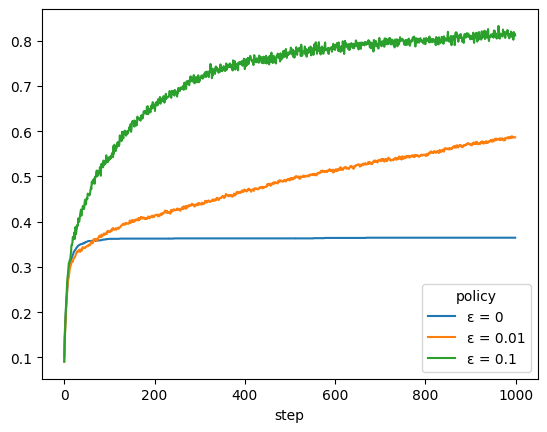

In [6]:
colors = {
    'ε = 0.1': 'tab:blue',
    'ε = 0.01': 'tab:red',
    'ε = 0': 'tab:green'
}

(
    trace_df
    .groupby(['step', 'policy'])
    ['is_action_optimal'].mean()
    .unstack()
    .plot()
)


## Handling drift

The environment used above is a toy situation used for introducing bandits. It is stationary, meaning that the expected reward of each arm does not change over time.

In practice, arms are dynamic, and their performance can vary over time. A simple example of this is the [Candy Cane Contest](https://www.kaggle.com/c/santa-2020) that was hosted on Kaggle in 2020. The expected reward of each arm diminishes each time it is pulled.

The way bandit policies in River deal with drift depends on the method. For the `bandit.EpsilonGreedy` policy, it makes sense to use a rolling average as the reward object. What this means is that the empirical reward the policy calculates for each arm is a rolling average, rather than a global one.

In [7]:
from river import proba, utils

policies=[
    bandit.EpsilonGreedy(
        epsilon=0.1,
        seed=42
    ),
    bandit.EpsilonGreedy(
        epsilon=0.3,
        reward_obj=utils.Rolling(stats.Mean(), window_size=50),
        seed=42
    ),
    bandit.ThompsonSampling(
        reward_obj=proba.Beta(),
        seed=42
    )
]

env = gym.make('river_bandits/CandyCaneContest-v0')

trace = bandit.evaluate(
    policies=policies,
    env=env,
    n_episodes=(n_episodes := 30),
    seed=42
)

trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))


  0%|          | 0/180000 [00:00<?, ?it/s]

  0%|          | 709/180000 [00:00<00:25, 7087.22it/s]

  1%|          | 1464/180000 [00:00<00:24, 7348.25it/s]

  1%|          | 2211/180000 [00:00<00:24, 7400.51it/s]

  2%|▏         | 2979/180000 [00:00<00:23, 7504.60it/s]

  2%|▏         | 3735/180000 [00:00<00:23, 7522.41it/s]

  2%|▏         | 4488/180000 [00:00<00:23, 7514.06it/s]

  3%|▎         | 5244/180000 [00:00<00:23, 7525.60it/s]

  3%|▎         | 6001/180000 [00:00<00:23, 7352.93it/s]

  4%|▍         | 6771/180000 [00:00<00:23, 7457.14it/s]

  4%|▍         | 7518/180000 [00:01<00:23, 7454.62it/s]

  5%|▍         | 8264/180000 [00:01<00:23, 7456.13it/s]

  5%|▌         | 9014/180000 [00:01<00:22, 7468.93it/s]

  5%|▌         | 9762/180000 [00:01<00:22, 7462.80it/s]

  6%|▌         | 10509/180000 [00:01<00:22, 7451.57it/s]

  6%|▋         | 11256/180000 [00:01<00:22, 7453.99it/s]

  7%|▋         | 12002/180000 [00:01<00:24, 6926.05it/s]

  7%|▋         | 12783/180000 [00:01<00:23, 7174.22it/s]

  8%|▊         | 13518/180000 [00:01<00:23, 7221.17it/s]

  8%|▊         | 14247/180000 [00:01<00:22, 7240.67it/s]

  8%|▊         | 14990/180000 [00:02<00:22, 7295.83it/s]

  9%|▊         | 15726/180000 [00:02<00:22, 7309.30it/s]

  9%|▉         | 16464/180000 [00:02<00:22, 7324.87it/s]

 10%|▉         | 17199/180000 [00:02<00:22, 7327.68it/s]

 10%|▉         | 17940/180000 [00:02<00:22, 7349.16it/s]

 10%|█         | 18676/180000 [00:02<00:22, 7234.18it/s]

 11%|█         | 19419/180000 [00:02<00:22, 7289.38it/s]

 11%|█         | 20166/180000 [00:02<00:21, 7338.98it/s]

 12%|█▏        | 20906/180000 [00:02<00:21, 7355.99it/s]

 12%|█▏        | 21654/180000 [00:02<00:21, 7387.60it/s]

 12%|█▏        | 22401/180000 [00:03<00:21, 7411.07it/s]

 13%|█▎        | 23145/180000 [00:03<00:21, 7416.46it/s]

 13%|█▎        | 23891/180000 [00:03<00:21, 7429.13it/s]

 14%|█▎        | 24635/180000 [00:03<00:21, 7269.83it/s]

 14%|█▍        | 25374/180000 [00:03<00:21, 7303.37it/s]

 15%|█▍        | 26105/180000 [00:03<00:21, 7296.71it/s]

 15%|█▍        | 26836/180000 [00:03<00:21, 7291.22it/s]

 15%|█▌        | 27566/180000 [00:03<00:20, 7283.81it/s]

 16%|█▌        | 28299/180000 [00:03<00:20, 7297.14it/s]

 16%|█▌        | 29031/180000 [00:03<00:20, 7302.91it/s]

 17%|█▋        | 29766/180000 [00:04<00:20, 7312.52it/s]

 17%|█▋        | 30498/180000 [00:04<00:20, 7183.31it/s]

 17%|█▋        | 31253/180000 [00:04<00:20, 7290.96it/s]

 18%|█▊        | 32002/180000 [00:04<00:20, 7349.70it/s]

 18%|█▊        | 32738/180000 [00:04<00:20, 7352.52it/s]

 19%|█▊        | 33474/180000 [00:04<00:19, 7343.19it/s]

 19%|█▉        | 34209/180000 [00:04<00:19, 7339.28it/s]

 19%|█▉        | 34944/180000 [00:04<00:19, 7297.84it/s]

 20%|█▉        | 35679/180000 [00:04<00:19, 7310.43it/s]

 20%|██        | 36411/180000 [00:04<00:20, 7151.33it/s]

 21%|██        | 37168/180000 [00:05<00:19, 7274.31it/s]

 21%|██        | 37916/180000 [00:05<00:19, 7334.19it/s]

 21%|██▏       | 38662/180000 [00:05<00:19, 7371.37it/s]

 22%|██▏       | 39409/180000 [00:05<00:18, 7399.71it/s]

 22%|██▏       | 40158/180000 [00:05<00:18, 7424.98it/s]

 23%|██▎       | 40908/180000 [00:05<00:18, 7441.97it/s]

 23%|██▎       | 41655/180000 [00:05<00:18, 7446.54it/s]

 24%|██▎       | 42400/180000 [00:05<00:19, 7228.82it/s]

 24%|██▍       | 43162/180000 [00:05<00:18, 7343.15it/s]

 24%|██▍       | 43908/180000 [00:05<00:18, 7373.07it/s]

 25%|██▍       | 44652/180000 [00:06<00:18, 7388.44it/s]

 25%|██▌       | 45393/180000 [00:06<00:18, 7394.25it/s]

 26%|██▌       | 46134/180000 [00:06<00:18, 7393.08it/s]

 26%|██▌       | 46874/180000 [00:06<00:18, 7379.20it/s]

 26%|██▋       | 47613/180000 [00:06<00:17, 7363.50it/s]

 27%|██▋       | 48350/180000 [00:06<00:18, 7171.85it/s]

 27%|██▋       | 49101/180000 [00:06<00:18, 7268.31it/s]

 28%|██▊       | 49829/180000 [00:06<00:18, 7119.13it/s]

 28%|██▊       | 50559/180000 [00:06<00:18, 7165.89it/s]

 28%|██▊       | 51291/180000 [00:06<00:17, 7209.26it/s]

 29%|██▉       | 52026/180000 [00:07<00:17, 7248.37it/s]

 29%|██▉       | 52757/180000 [00:07<00:17, 7266.00it/s]

 30%|██▉       | 53487/180000 [00:07<00:17, 7273.33it/s]

 30%|███       | 54215/180000 [00:07<00:17, 7073.46it/s]

 31%|███       | 54978/180000 [00:07<00:17, 7234.68it/s]

 31%|███       | 55704/180000 [00:07<00:17, 7236.28it/s]

 31%|███▏      | 56430/180000 [00:07<00:17, 7240.28it/s]

 32%|███▏      | 57155/180000 [00:07<00:16, 7235.38it/s]

 32%|███▏      | 57886/180000 [00:07<00:16, 7256.48it/s]

 33%|███▎      | 58612/180000 [00:08<00:16, 7255.96it/s]

 33%|███▎      | 59338/180000 [00:08<00:16, 7250.79it/s]

 33%|███▎      | 60064/180000 [00:08<00:17, 6968.28it/s]

 34%|███▍      | 60847/180000 [00:08<00:16, 7218.18it/s]

 34%|███▍      | 61578/180000 [00:08<00:16, 7242.66it/s]

 35%|███▍      | 62310/180000 [00:08<00:16, 7261.85it/s]

 35%|███▌      | 63045/180000 [00:08<00:16, 7280.11it/s]

 35%|███▌      | 63780/180000 [00:08<00:15, 7296.80it/s]

 36%|███▌      | 64511/180000 [00:08<00:15, 7273.82it/s]

 36%|███▌      | 65244/180000 [00:08<00:15, 7289.68it/s]

 37%|███▋      | 65976/180000 [00:09<00:15, 7296.54it/s]

 37%|███▋      | 66706/180000 [00:09<00:15, 7159.44it/s]

 37%|███▋      | 67440/180000 [00:09<00:15, 7208.59it/s]

 38%|███▊      | 68169/180000 [00:09<00:15, 7231.09it/s]

 38%|███▊      | 68901/180000 [00:09<00:15, 7255.00it/s]

 39%|███▊      | 69627/180000 [00:09<00:15, 7243.93it/s]

 39%|███▉      | 70359/180000 [00:09<00:15, 7265.20it/s]

 39%|███▉      | 71088/180000 [00:09<00:14, 7271.55it/s]

 40%|███▉      | 71816/180000 [00:09<00:14, 7249.70it/s]

 40%|████      | 72542/180000 [00:09<00:15, 7042.01it/s]

 41%|████      | 73290/180000 [00:10<00:14, 7166.55it/s]

 41%|████      | 74031/180000 [00:10<00:14, 7232.84it/s]

 42%|████▏     | 74768/180000 [00:10<00:14, 7272.58it/s]

 42%|████▏     | 75498/180000 [00:10<00:14, 7276.03it/s]

 42%|████▏     | 76227/180000 [00:10<00:14, 7278.60it/s]

 43%|████▎     | 76959/180000 [00:10<00:14, 7288.50it/s]

 43%|████▎     | 77695/180000 [00:10<00:13, 7309.04it/s]

 44%|████▎     | 78427/180000 [00:10<00:14, 7165.30it/s]

 44%|████▍     | 79176/180000 [00:10<00:13, 7258.53it/s]

 44%|████▍     | 79914/180000 [00:10<00:13, 7290.64it/s]

 45%|████▍     | 80646/180000 [00:11<00:13, 7295.58it/s]

 45%|████▌     | 81376/180000 [00:11<00:13, 7291.57it/s]

 46%|████▌     | 82107/180000 [00:11<00:13, 7291.14it/s]

 46%|████▌     | 82845/180000 [00:11<00:13, 7314.68it/s]

 46%|████▋     | 83583/180000 [00:11<00:13, 7333.50it/s]

 47%|████▋     | 84317/180000 [00:11<00:13, 7145.87it/s]

 47%|████▋     | 85083/180000 [00:11<00:13, 7296.08it/s]

 48%|████▊     | 85818/180000 [00:11<00:12, 7310.30it/s]

 48%|████▊     | 86550/180000 [00:11<00:12, 7311.05it/s]

 48%|████▊     | 87282/180000 [00:11<00:13, 6996.65it/s]

 49%|████▉     | 88014/180000 [00:12<00:12, 7086.60it/s]

 49%|████▉     | 88746/180000 [00:12<00:12, 7149.96it/s]

 50%|████▉     | 89478/180000 [00:12<00:12, 7194.07it/s]

 50%|█████     | 90199/180000 [00:12<00:12, 7008.92it/s]

 51%|█████     | 90969/180000 [00:12<00:12, 7204.90it/s]

 51%|█████     | 91707/180000 [00:12<00:12, 7252.27it/s]

 51%|█████▏    | 92457/180000 [00:12<00:11, 7320.91it/s]

 52%|█████▏    | 93201/180000 [00:12<00:11, 7355.89it/s]

 52%|█████▏    | 93943/180000 [00:12<00:11, 7374.07it/s]

 53%|█████▎    | 94681/180000 [00:12<00:11, 7355.38it/s]

 53%|█████▎    | 95417/180000 [00:13<00:11, 7344.50it/s]

 53%|█████▎    | 96152/180000 [00:13<00:11, 7112.19it/s]

 54%|█████▍    | 96927/180000 [00:13<00:11, 7298.35it/s]

 54%|█████▍    | 97663/180000 [00:13<00:11, 7315.00it/s]

 55%|█████▍    | 98403/180000 [00:13<00:11, 7335.43it/s]

 55%|█████▌    | 99141/180000 [00:13<00:11, 7346.12it/s]

 55%|█████▌    | 99879/180000 [00:13<00:10, 7352.26it/s]

 56%|█████▌    | 100615/180000 [00:13<00:10, 7354.37it/s]

 56%|█████▋    | 101351/180000 [00:13<00:10, 7348.41it/s]

 57%|█████▋    | 102087/180000 [00:14<00:11, 7040.13it/s]

 57%|█████▋    | 102882/180000 [00:14<00:10, 7303.02it/s]

 58%|█████▊    | 103620/180000 [00:14<00:10, 7324.78it/s]

 58%|█████▊    | 104355/180000 [00:14<00:10, 7304.99it/s]

 58%|█████▊    | 105087/180000 [00:14<00:10, 7301.35it/s]

 59%|█████▉    | 105819/180000 [00:14<00:10, 7300.13it/s]

 59%|█████▉    | 106550/180000 [00:14<00:10, 7301.25it/s]

 60%|█████▉    | 107281/180000 [00:14<00:09, 7303.65it/s]

 60%|██████    | 108012/180000 [00:14<00:10, 7005.28it/s]

 60%|██████    | 108801/180000 [00:14<00:09, 7259.39it/s]

 61%|██████    | 109530/180000 [00:15<00:09, 7261.47it/s]

 61%|██████▏   | 110259/180000 [00:15<00:09, 7266.63it/s]

 62%|██████▏   | 110997/180000 [00:15<00:09, 7295.92it/s]

 62%|██████▏   | 111732/180000 [00:15<00:09, 7311.91it/s]

 62%|██████▏   | 112467/180000 [00:15<00:09, 7320.39it/s]

 63%|██████▎   | 113202/180000 [00:15<00:09, 7327.79it/s]

 63%|██████▎   | 113940/180000 [00:15<00:09, 7337.62it/s]

 64%|██████▎   | 114675/180000 [00:15<00:09, 7202.19it/s]

 64%|██████▍   | 115417/180000 [00:15<00:08, 7266.12it/s]

 65%|██████▍   | 116154/180000 [00:15<00:08, 7295.76it/s]

 65%|██████▍   | 116885/180000 [00:16<00:08, 7131.98it/s]

 65%|██████▌   | 117622/180000 [00:16<00:08, 7201.14it/s]

 66%|██████▌   | 118360/180000 [00:16<00:08, 7253.78it/s]

 66%|██████▌   | 119097/180000 [00:16<00:08, 7283.18it/s]

 67%|██████▋   | 119835/180000 [00:16<00:08, 7309.84it/s]

 67%|██████▋   | 120567/180000 [00:16<00:08, 7172.76it/s]

 67%|██████▋   | 121313/180000 [00:16<00:08, 7257.31it/s]

 68%|██████▊   | 122052/180000 [00:16<00:07, 7295.70it/s]

 68%|██████▊   | 122796/180000 [00:16<00:07, 7332.89it/s]

 69%|██████▊   | 123534/180000 [00:16<00:07, 7344.87it/s]

 69%|██████▉   | 124269/180000 [00:17<00:07, 7345.93it/s]

 69%|██████▉   | 125010/180000 [00:17<00:07, 7363.83it/s]

 70%|██████▉   | 125751/180000 [00:17<00:07, 7373.99it/s]

 70%|███████   | 126489/180000 [00:17<00:07, 7202.23it/s]

 71%|███████   | 127239/180000 [00:17<00:07, 7288.21it/s]

 71%|███████   | 127970/180000 [00:17<00:07, 7293.66it/s]

 72%|███████▏  | 128700/180000 [00:17<00:07, 7284.91it/s]

 72%|███████▏  | 129433/180000 [00:17<00:06, 7297.40it/s]

 72%|███████▏  | 130170/180000 [00:17<00:06, 7312.64it/s]

 73%|███████▎  | 130905/180000 [00:17<00:06, 7322.95it/s]

 73%|███████▎  | 131638/180000 [00:18<00:06, 7013.11it/s]

 74%|███████▎  | 132343/180000 [00:18<00:06, 6927.19it/s]

 74%|███████▍  | 133095/180000 [00:18<00:06, 7094.15it/s]

 74%|███████▍  | 133812/180000 [00:18<00:06, 7111.93it/s]

 75%|███████▍  | 134538/180000 [00:18<00:06, 7152.91it/s]

 75%|███████▌  | 135264/180000 [00:18<00:06, 7181.88it/s]

 76%|███████▌  | 135999/180000 [00:18<00:06, 7227.24it/s]

 76%|███████▌  | 136729/180000 [00:18<00:05, 7248.12it/s]

 76%|███████▋  | 137460/180000 [00:18<00:05, 7265.64it/s]

 77%|███████▋  | 138187/180000 [00:18<00:05, 7052.78it/s]

 77%|███████▋  | 138900/180000 [00:19<00:05, 7073.78it/s]

 78%|███████▊  | 139609/180000 [00:19<00:05, 7003.11it/s]

 78%|███████▊  | 140340/180000 [00:19<00:05, 7088.31it/s]

 78%|███████▊  | 141072/180000 [00:19<00:05, 7155.34it/s]

 79%|███████▉  | 141804/180000 [00:19<00:05, 7198.34it/s]

 79%|███████▉  | 142534/180000 [00:19<00:05, 7228.41it/s]

 80%|███████▉  | 143258/180000 [00:19<00:05, 7204.65it/s]

 80%|███████▉  | 143994/180000 [00:19<00:04, 7244.92it/s]

 80%|████████  | 144719/180000 [00:19<00:04, 7144.42it/s]

 81%|████████  | 145461/180000 [00:20<00:04, 7220.42it/s]

 81%|████████  | 146202/180000 [00:20<00:04, 7274.77it/s]

 82%|████████▏ | 146938/180000 [00:20<00:04, 7299.83it/s]

 82%|████████▏ | 147675/180000 [00:20<00:04, 7317.68it/s]

 82%|████████▏ | 148413/180000 [00:20<00:04, 7335.38it/s]

 83%|████████▎ | 149151/180000 [00:20<00:04, 7346.47it/s]

 83%|████████▎ | 149889/180000 [00:20<00:04, 7351.39it/s]

 84%|████████▎ | 150625/180000 [00:20<00:04, 7217.77it/s]

 84%|████████▍ | 151365/180000 [00:20<00:03, 7271.50it/s]

 85%|████████▍ | 152107/180000 [00:20<00:03, 7314.90it/s]

 85%|████████▍ | 152844/180000 [00:21<00:03, 7327.85it/s]

 85%|████████▌ | 153582/180000 [00:21<00:03, 7340.75it/s]

 86%|████████▌ | 154317/180000 [00:21<00:03, 7325.10it/s]

 86%|████████▌ | 155050/180000 [00:21<00:03, 7320.39it/s]

 87%|████████▋ | 155783/180000 [00:21<00:03, 6980.67it/s]

 87%|████████▋ | 156485/180000 [00:21<00:03, 6893.09it/s]

 87%|████████▋ | 157177/180000 [00:21<00:03, 6629.23it/s]

 88%|████████▊ | 157896/180000 [00:21<00:03, 6783.81it/s]

 88%|████████▊ | 158613/180000 [00:21<00:03, 6890.98it/s]

 89%|████████▊ | 159330/180000 [00:21<00:02, 6967.90it/s]

 89%|████████▉ | 160053/180000 [00:22<00:02, 7039.62it/s]

 89%|████████▉ | 160770/180000 [00:22<00:02, 7077.51it/s]

 90%|████████▉ | 161481/180000 [00:22<00:02, 7083.80it/s]

 90%|█████████ | 162191/180000 [00:22<00:02, 6779.38it/s]

 91%|█████████ | 162957/180000 [00:22<00:02, 7032.09it/s]

 91%|█████████ | 163686/180000 [00:22<00:02, 7105.20it/s]

 91%|█████████▏| 164416/180000 [00:22<00:02, 7161.31it/s]

 92%|█████████▏| 165153/180000 [00:22<00:02, 7220.71it/s]

 92%|█████████▏| 165881/180000 [00:22<00:01, 7237.52it/s]

 93%|█████████▎| 166611/180000 [00:22<00:01, 7251.51it/s]

 93%|█████████▎| 167343/180000 [00:23<00:01, 7266.17it/s]

 93%|█████████▎| 168071/180000 [00:23<00:01, 6999.25it/s]

 94%|█████████▍| 168849/180000 [00:23<00:01, 7222.99it/s]

 94%|█████████▍| 169587/180000 [00:23<00:01, 7265.00it/s]

 95%|█████████▍| 170325/180000 [00:23<00:01, 7297.46it/s]

 95%|█████████▌| 171057/180000 [00:23<00:01, 7301.88it/s]

 95%|█████████▌| 171789/180000 [00:23<00:01, 7301.00it/s]

 96%|█████████▌| 172521/180000 [00:23<00:01, 7302.44it/s]

 96%|█████████▋| 173253/180000 [00:23<00:00, 7306.88it/s]

 97%|█████████▋| 173984/180000 [00:23<00:00, 7306.92it/s]

 97%|█████████▋| 174715/180000 [00:24<00:00, 7144.37it/s]

 97%|█████████▋| 175449/180000 [00:24<00:00, 7198.94it/s]

 98%|█████████▊| 176178/180000 [00:24<00:00, 7222.12it/s]

 98%|█████████▊| 176901/180000 [00:24<00:00, 7223.60it/s]

 99%|█████████▊| 177639/180000 [00:24<00:00, 7267.26it/s]

 99%|█████████▉| 178374/180000 [00:24<00:00, 7287.52it/s]

100%|█████████▉| 179110/180000 [00:24<00:00, 7308.35it/s]

100%|█████████▉| 179847/180000 [00:24<00:00, 7323.14it/s]

100%|██████████| 180000/180000 [00:24<00:00, 7254.06it/s]

We can compare the performance of each policy by checking the average reward at the end of each episode.

In [8]:
(
    trace_df
    .groupby(['policy_idx', 'episode'])
    .last()
    .groupby('policy_idx')
    .reward_stat.mean()
)



policy_idx
0    736.1
1    817.0
2    854.0
Name: reward_stat, dtype: float64

We see that using a rolling average gives a boost to the epsilon greedy strategy. However, we see that the `bandit.ThompsonSampling` policy performs even better, even though no particular care was given to drift. A natural next step would thus be to see how it could be improved to handle drift. For instance, its `dist` parameter could be wrapped with a `utils.Rolling`:

In [9]:
policy = bandit.ThompsonSampling(
    reward_obj=utils.Rolling(proba.Beta(), window_size=50),
    seed=42
)


Bandits can be used for several tasks. They can be used for content personalization, as well as online model selection (see `model_selection.BanditRegressor`). The policies in River are therefore designed to be flexible, so that they can be used in conjunction with other River modules. For instance, the `reward_obj` in `bandit.EpsilonGreedy` can be a metric, a probability distribution, or a statistic. This works because objects in River adher to a coherent get/update interface.